# <a id="top"></a>  📊 Exploratory Data Analysis of ABCDEats Dataset
Authors:<br><br>
Student Name - Gonçalo Custódio<br>
- Student id - 20211643<br>
- Contact e-mail - 20211643@novaims.unl.pt<br>
  
Student Name - Diogo Correia<br>
- Student id - 20211586<br>
- Contact e-mail - 20211586@novaims.unl.pt<br>
  
Student Name - João Santos<br>
- Student id - 20211691<br>
- Contact e-mail - 20211691@novaims.unl.pt<br>
  
Student Name - Nuno Bernardino<br>
- Student id - 20211546<br>
- Contact e-mail - 20211546@novaims.unl.pt<br>

## Objectives
This notebook performs an **Exploratory Data Analysis (EDA)** on the ABCDEats dataset to uncover insights into customer behaviors, spending patterns, and trends that could support strategic decisions. Our analysis aims to:

1. **Summarize Key Statistics**: Calculate and interpret key measures to understand data characteristics.
2. **Identify Trends and Patterns**: Examine promotional effectiveness, payment preferences, regional concentration, and purchasing patterns.
3. **Detect Anomalies**: Highlight outliers or unusual data points that may reveal unique customer segments or operational insights.
4. **Feature Engineering**: Create new features like order frequency and average order value to enhance analysis.
5. **Visualize Findings**: Use charts and graphs to communicate our insights clearly and effectively.

## Index

1. **Exploration of the Dataset**
2. **Summary of Important Statistics**<br>
    >2.1. **Correlation**<br>
    2.2. **Box-Plot**<br>
    2.2.1. **Box-Plots of the Mean of CUI's, DOW's, HR's**<br>
    2.3. **Histograms**<br>
    2.4 **Heatmaps**<br>
3. **Create New Features**
4. **Identify Trends, Patterns, or Anomalies**
5. **Conclusion**

# Imports

In [334]:
#!pip install kmodes
#!pip install somoclu
#!pip install minisom

In [335]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from scipy.stats import zscore
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from scipy.stats import mstats

**Read the Dataset**

In [336]:
data = pd.read_excel("DM2425_ABCDEats_DATASET.xlsx", sheet_name="DM2425_ABCDEats_DATASET")
data_copy = data.copy()

# 1. Exploration of the Dataset
[⬆️ Back to Top](#top)

**Initial Analysis**

To kick off our deep exploration, we’ll use the `data.info()` command to get an overview of the dataset. This command provides essential information, including the number of entries, column names, non-null counts, and data types for each variable. This quick summary will allow us to identify any missing values, spot potential data type issues, and gain a high-level understanding of the dataset's structure, setting the stage for further analysis.



In [337]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

**Check data types of our variables**

In this step, we’ll use the `data.dtypes` command to examine the data types of each variable in our dataset. This overview will confirm if the variables are appropriately typed (e.g., integers, floats, objects) and will help us spot any inconsistencies or unexpected types that might require adjustment. Understanding the data types at this stage is crucial, as it guides us in selecting suitable preprocessing and analysis techniques for each variable.

In [338]:
data.dtypes

customer_id                  object
customer_region              object
customer_age                float64
vendor_count                  int64
product_count                 int64
is_chain                      int64
first_order                 float64
last_order                    int64
last_promo                   object
payment_method               object
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
DOW_0                         int64
DOW_1                         int64
DOW_2                       

**Summary Stats and Missing Values Check**

In [339]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,31888,31875,742ca068fc,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_region,31888.0,9.0,8670.0,9761.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_age,31161.0,NaN,NaN,NaN,27.506499,7.160898,15.0,23.0,26.0,31.0,80.0
vendor_count,31888.0,NaN,NaN,NaN,3.102609,2.771587,0.0,1.0,2.0,4.0,41.0
product_count,31888.0,NaN,NaN,NaN,5.668245,6.957287,0.0,2.0,3.0,7.0,269.0
is_chain,31888.0,NaN,NaN,NaN,2.818866,3.977529,0.0,1.0,2.0,3.0,83.0
first_order,31782.0,NaN,NaN,NaN,28.478604,24.109086,0.0,7.0,22.0,45.0,90.0
last_order,31888.0,NaN,NaN,NaN,63.675521,23.226123,0.0,49.0,70.0,83.0,90.0
last_promo,31888,4,-,16748,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_method,31888,3,CARD,20161,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [340]:
data.isnull().sum()

customer_id                    0
customer_region                0
customer_age                 727
vendor_count                   0
product_count                  0
is_chain                       0
first_order                  106
last_order                     0
last_promo                     0
payment_method                 0
CUI_American                   0
CUI_Asian                      0
CUI_Beverages                  0
CUI_Cafe                       0
CUI_Chicken Dishes             0
CUI_Chinese                    0
CUI_Desserts                   0
CUI_Healthy                    0
CUI_Indian                     0
CUI_Italian                    0
CUI_Japanese                   0
CUI_Noodle Dishes              0
CUI_OTHER                      0
CUI_Street Food / Snacks       0
CUI_Thai                       0
DOW_0                          0
DOW_1                          0
DOW_2                          0
DOW_3                          0
DOW_4                          0
DOW_5     

Since we don't agree with the fact that the variables in question (last_promo, payment_method and customer_region) are of type object we will change them to category in order to facilitate future analysis:

In [341]:
data['last_promo'] = data['last_promo'].astype('category')
data['payment_method'] = data['payment_method'].astype('category')
data['customer_region'] = data['customer_region'].astype('category')
data['customer_age'] = data['customer_age'].fillna(0).astype('int64')

We will divide the variables into lists for categorical and numerical variables to facilitate future interactions:

In [342]:
category_var = ['customer_region', 'last_promo', 'payment_method']

In [343]:
number_var = ['customer_age', 'vendor_count', 'product_count', 'is_chain', 'first_order', 'last_order', 
              'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 
              'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 
              'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 
              'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 
              'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 
              'HR_21', 'HR_22', 'HR_23']

In [344]:
print("Categorical Variable Types:")
print(data[category_var].dtypes)
print("\nNumerical Variable Types:")
print(data[number_var].dtypes)

Categorical Variable Types:
customer_region    category
last_promo         category
payment_method     category
dtype: object

Numerical Variable Types:
customer_age                  int64
vendor_count                  int64
product_count                 int64
is_chain                      int64
first_order                 float64
last_order                    int64
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
DOW_0                         int64
DOW_1                         int64
DOW_2              

# Missing Values Treatment

In [345]:
data.isnull().sum()

customer_id                    0
customer_region                0
customer_age                   0
vendor_count                   0
product_count                  0
is_chain                       0
first_order                  106
last_order                     0
last_promo                     0
payment_method                 0
CUI_American                   0
CUI_Asian                      0
CUI_Beverages                  0
CUI_Cafe                       0
CUI_Chicken Dishes             0
CUI_Chinese                    0
CUI_Desserts                   0
CUI_Healthy                    0
CUI_Indian                     0
CUI_Italian                    0
CUI_Japanese                   0
CUI_Noodle Dishes              0
CUI_OTHER                      0
CUI_Street Food / Snacks       0
CUI_Thai                       0
DOW_0                          0
DOW_1                          0
DOW_2                          0
DOW_3                          0
DOW_4                          0
DOW_5     

In [346]:
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputation to the numerical columns
data[number_var] = knn_imputer.fit_transform(data[number_var])
print(data.isnull().sum())

customer_id                 0
customer_region             0
customer_age                0
vendor_count                0
product_count               0
is_chain                    0
first_order                 0
last_order                  0
last_promo                  0
payment_method              0
CUI_American                0
CUI_Asian                   0
CUI_Beverages               0
CUI_Cafe                    0
CUI_Chicken Dishes          0
CUI_Chinese                 0
CUI_Desserts                0
CUI_Healthy                 0
CUI_Indian                  0
CUI_Italian                 0
CUI_Japanese                0
CUI_Noodle Dishes           0
CUI_OTHER                   0
CUI_Street Food / Snacks    0
CUI_Thai                    0
DOW_0                       0
DOW_1                       0
DOW_2                       0
DOW_3                       0
DOW_4                       0
DOW_5                       0
DOW_6                       0
HR_0                        0
HR_1      

# 2. Identify Trends, Patterns, or Anomalies

In this chapter, our objective is to uncover underlying trends, patterns, and anomalies within the data. By systematically analyzing these elements, we can detect recurring behaviors, identify correlations, and highlight unusual values or outliers that might impact our analysis. Understanding these factors is essential in a data mining project, as they often reveal deeper insights and influence the accuracy of predictive models. This analysis will inform our feature engineering choices and guide us toward meaningful data transformations, ultimately enhancing the value and interpretability of our results.

[⬆️ Back to Top](#top)

### 2.1 Descriptive Statistics

In [347]:
data[number_var].describe()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
count,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,...,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000
mean,26.879390,3.102609,5.668245,2.818866,28.394343,63.675521,4.880438,9.960451,2.300633,0.801163,...,0.215630,0.277032,0.356435,0.390962,0.336961,0.245610,0.142812,0.071155,0.048263,0.045189
std,8.183286,2.771587,6.957287,3.977529,24.113324,23.226123,11.654018,23.564351,8.479734,6.427132,...,0.599006,0.738162,0.874449,0.943721,0.893949,0.795296,0.586529,0.348536,0.298265,0.282006
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,1.000000,2.000000,1.000000,7.000000,49.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,3.000000,2.000000,22.000000,70.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.000000,4.000000,7.000000,3.000000,45.000000,83.000000,5.660000,11.830000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.000000,41.000000,269.000000,83.000000,90.000000,90.000000,280.210000,896.710000,229.220000,326.100000,...,13.000000,23.000000,22.000000,20.000000,24.000000,35.000000,36.000000,11.000000,15.000000,13.000000


In [348]:
for var in category_var:
    print(f"Distribution for {var}:")
    print(data[var].value_counts(normalize=True) * 100)
    print("\n")

Distribution for customer_region:
customer_region
8670    30.610261
4660    29.948570
2360    27.687531
2440     4.650652
4140     2.687531
8370     1.552308
2490     1.395509
-        1.386101
8550     0.081535
Name: proportion, dtype: float64


Distribution for last_promo:
last_promo
-           52.521325
DELIVERY    19.712745
DISCOUNT    14.099348
FREEBIE     13.666583
Name: proportion, dtype: float64


Distribution for payment_method:
payment_method
CARD    63.224410
DIGI    19.132589
CASH    17.643001
Name: proportion, dtype: float64




### 2.1 Visualization

array([[<Axes: title={'center': 'customer_age'}>,
        <Axes: title={'center': 'vendor_count'}>,
        <Axes: title={'center': 'product_count'}>,
        <Axes: title={'center': 'is_chain'}>,
        <Axes: title={'center': 'first_order'}>,
        <Axes: title={'center': 'last_order'}>,
        <Axes: title={'center': 'CUI_American'}>],
       [<Axes: title={'center': 'CUI_Asian'}>,
        <Axes: title={'center': 'CUI_Beverages'}>,
        <Axes: title={'center': 'CUI_Cafe'}>,
        <Axes: title={'center': 'CUI_Chicken Dishes'}>,
        <Axes: title={'center': 'CUI_Chinese'}>,
        <Axes: title={'center': 'CUI_Desserts'}>,
        <Axes: title={'center': 'CUI_Healthy'}>],
       [<Axes: title={'center': 'CUI_Indian'}>,
        <Axes: title={'center': 'CUI_Italian'}>,
        <Axes: title={'center': 'CUI_Japanese'}>,
        <Axes: title={'center': 'CUI_Noodle Dishes'}>,
        <Axes: title={'center': 'CUI_OTHER'}>,
        <Axes: title={'center': 'CUI_Street Food / Snacks

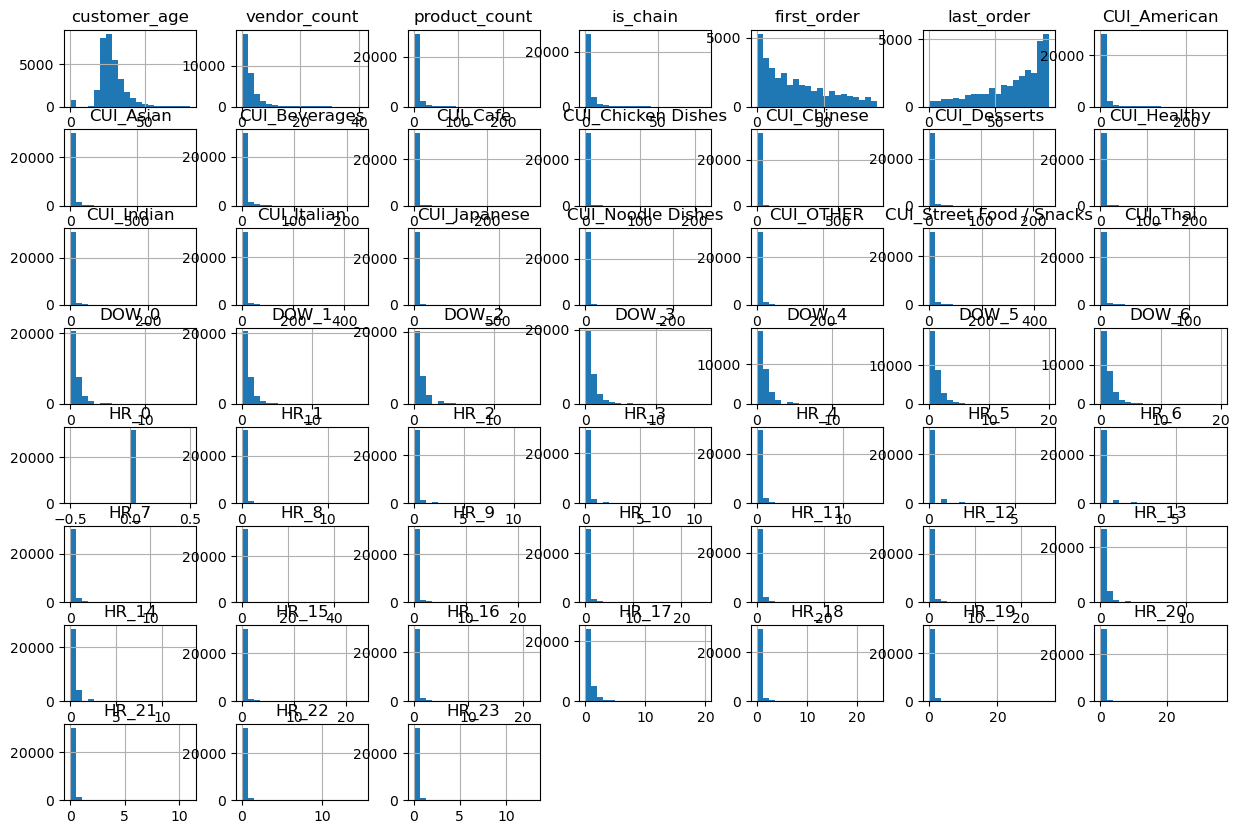

In [349]:
data[number_var].hist(figsize=(15, 10), bins=20)

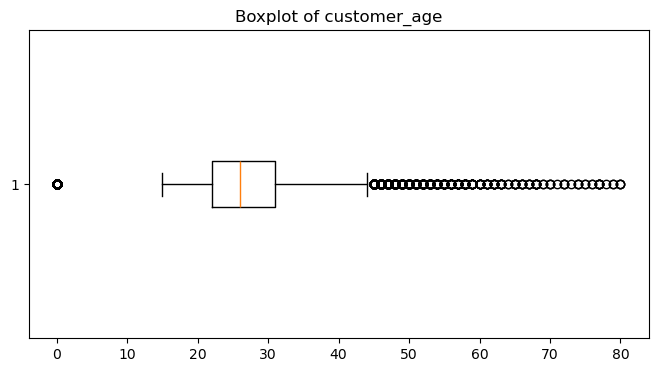

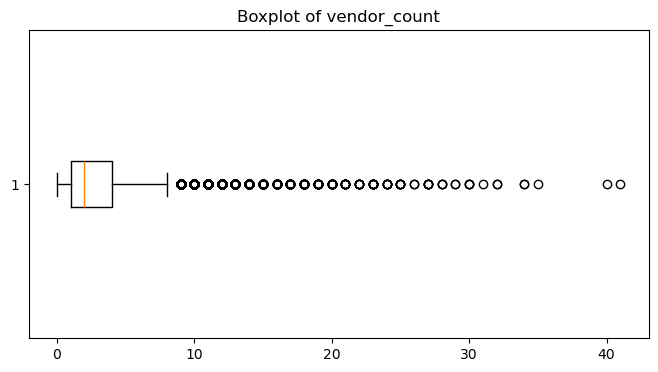

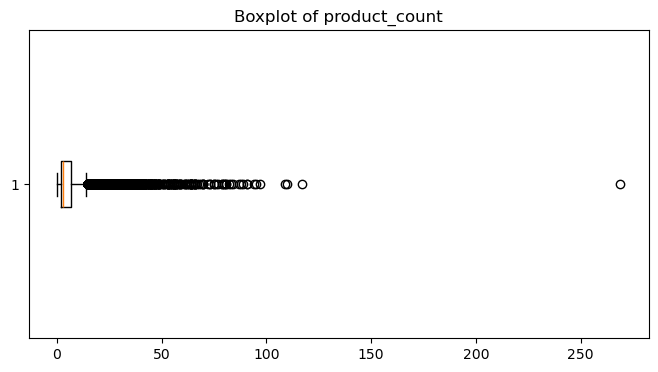

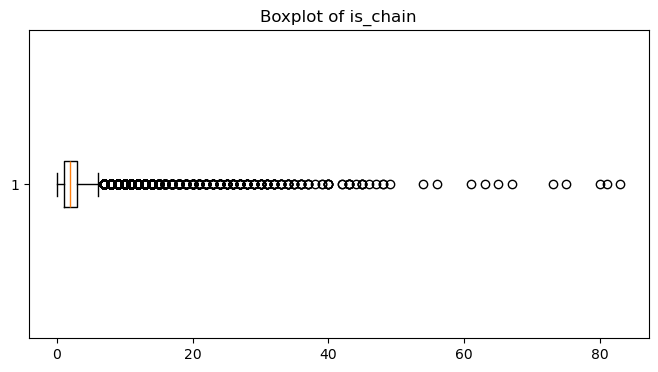

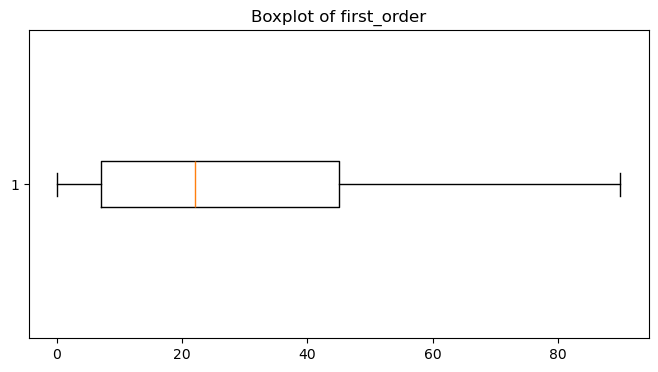

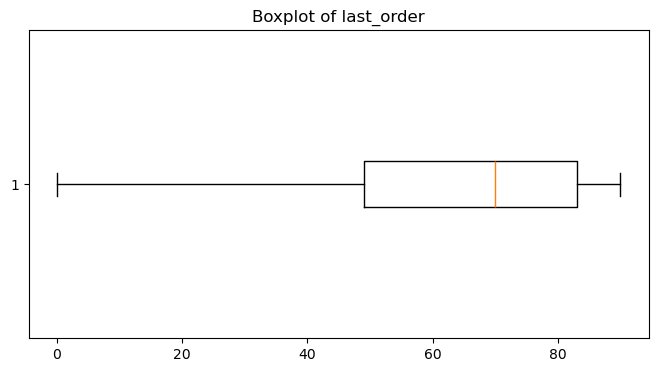

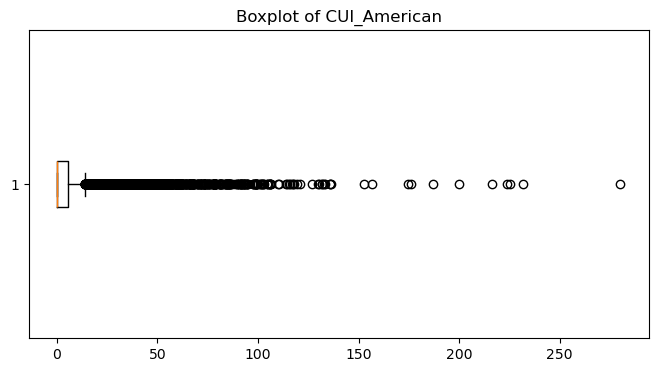

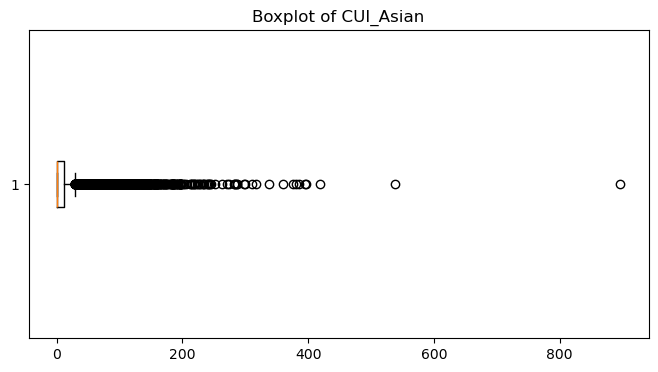

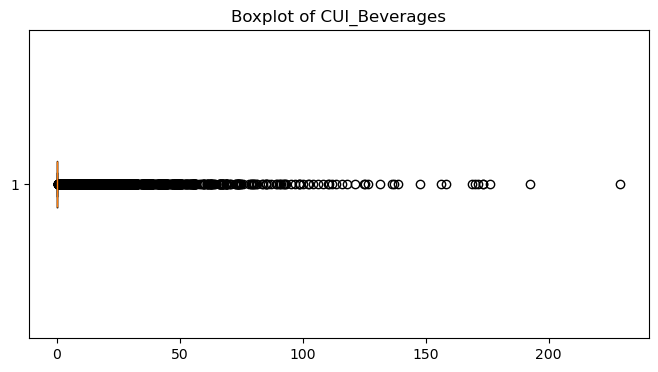

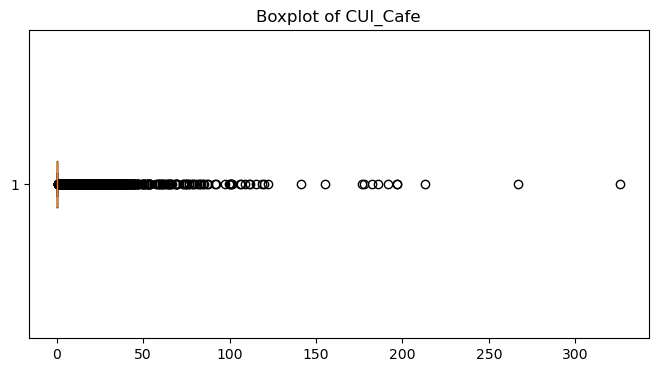

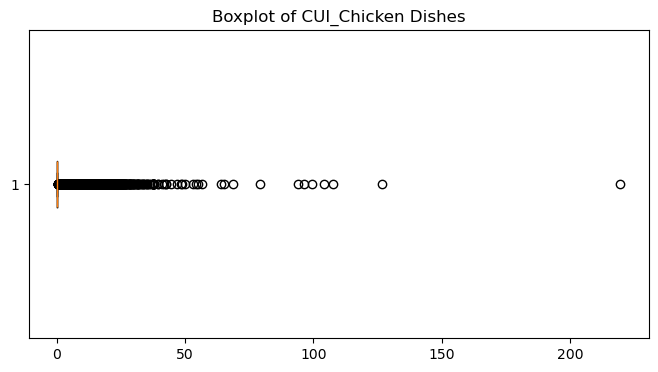

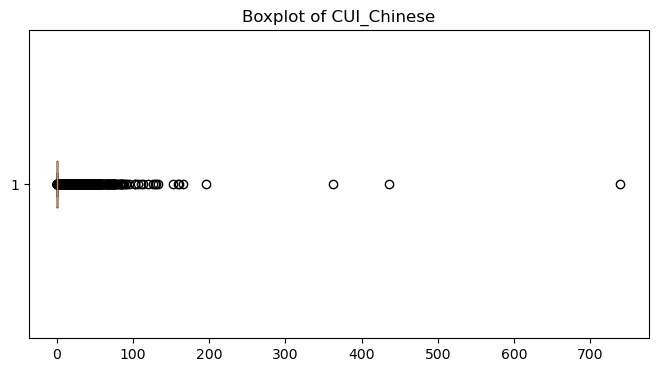

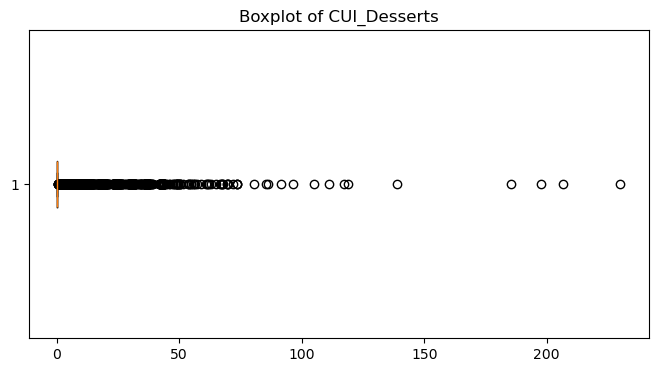

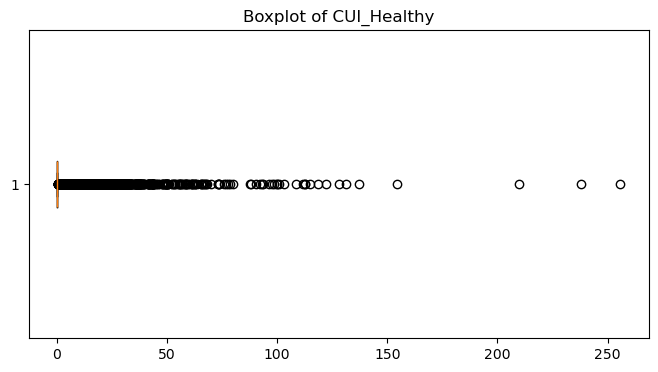

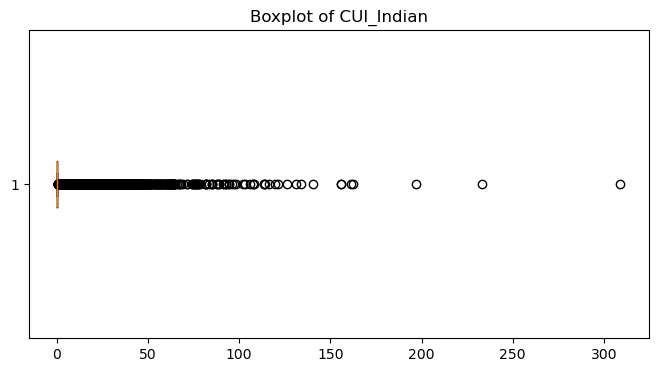

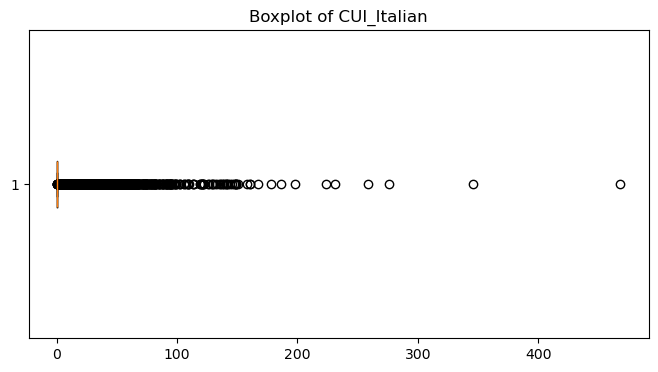

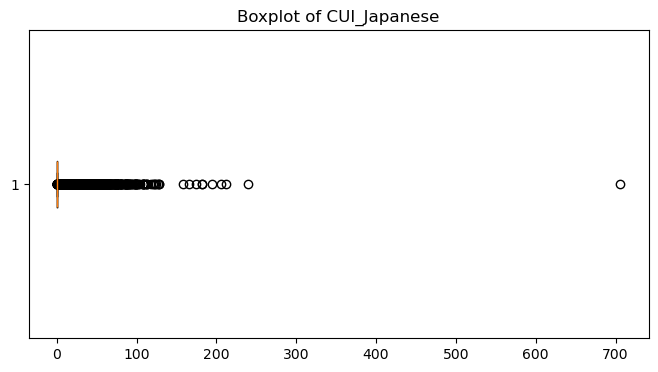

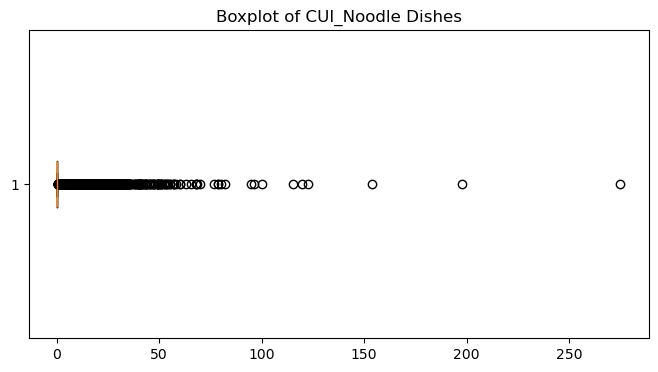

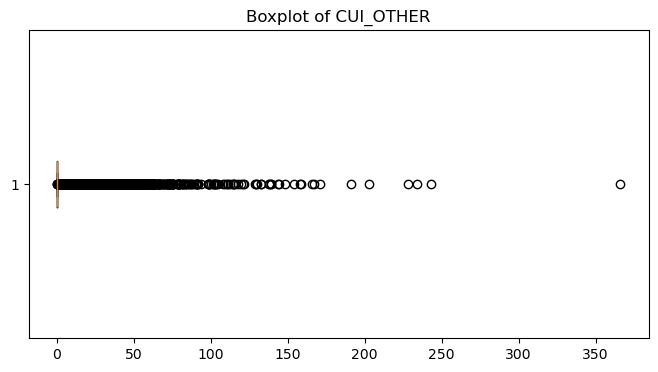

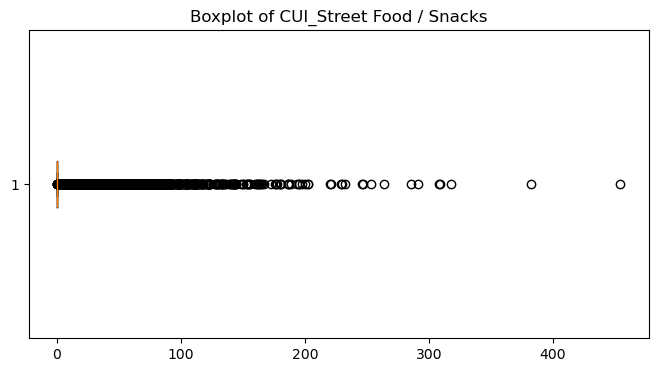

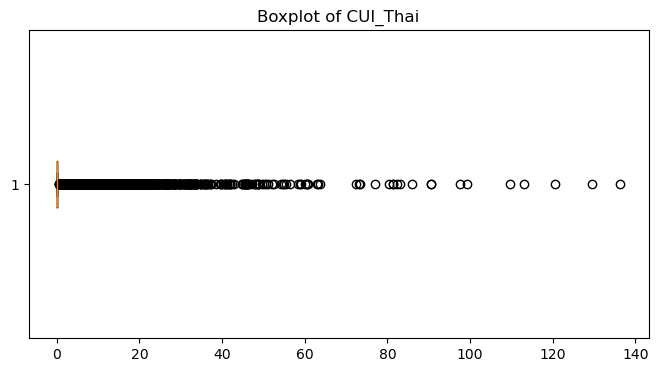

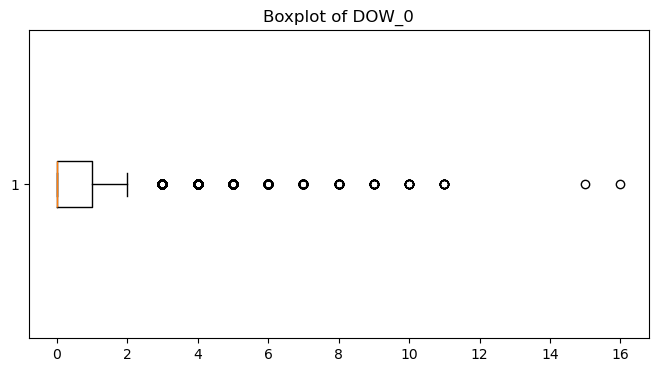

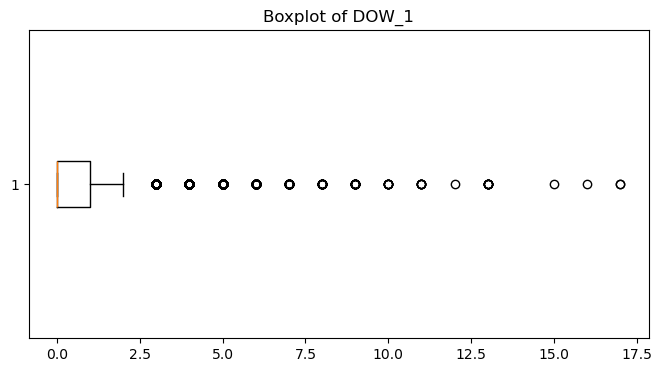

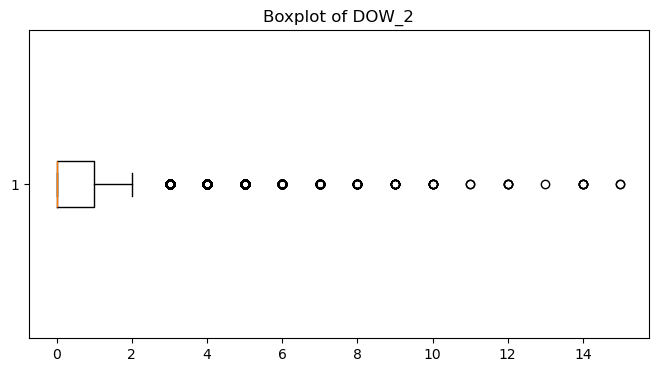

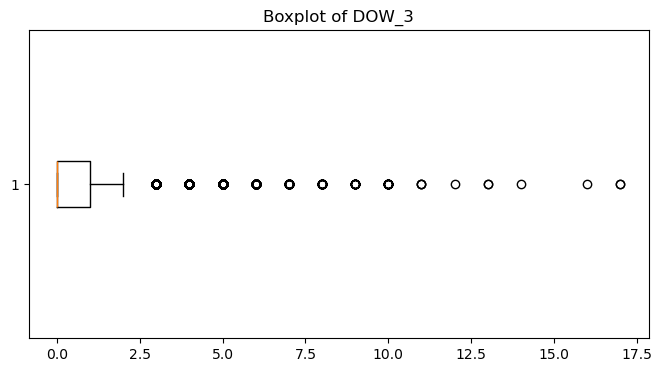

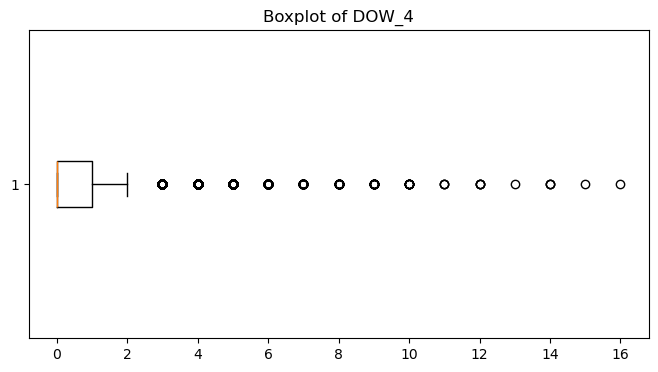

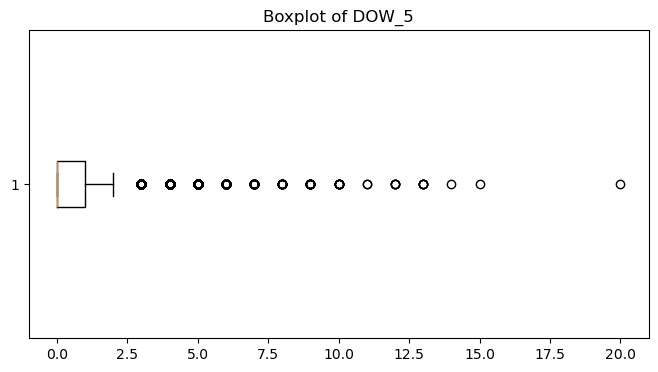

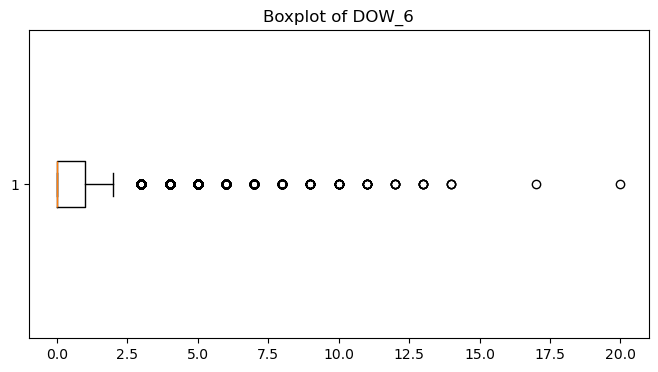

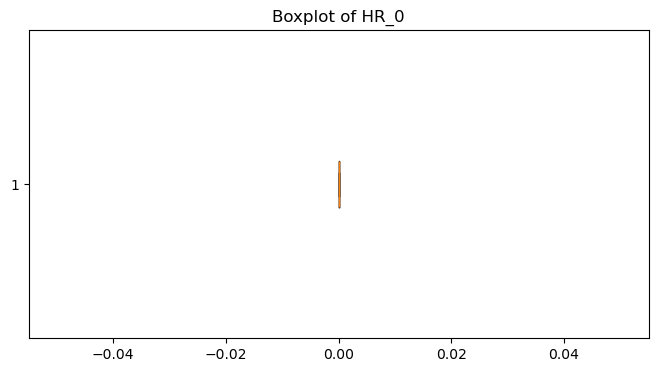

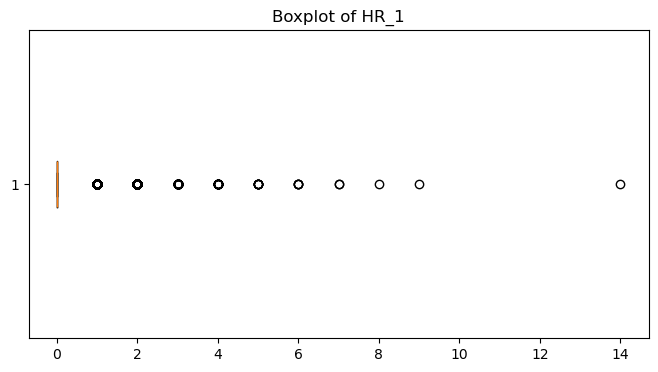

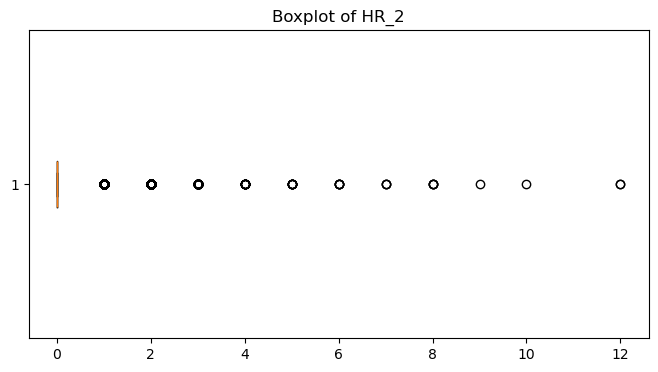

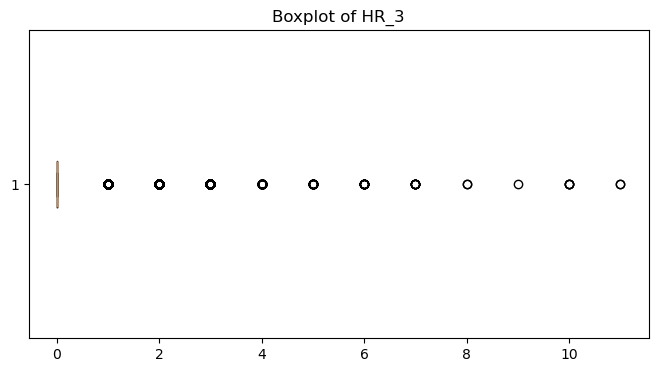

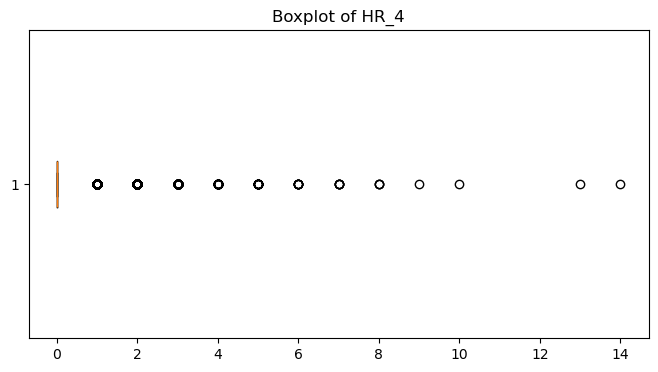

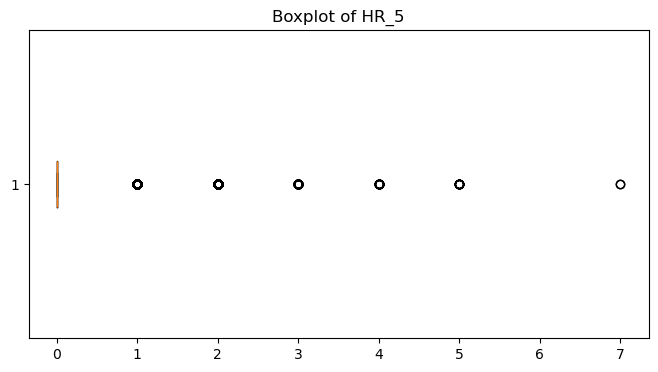

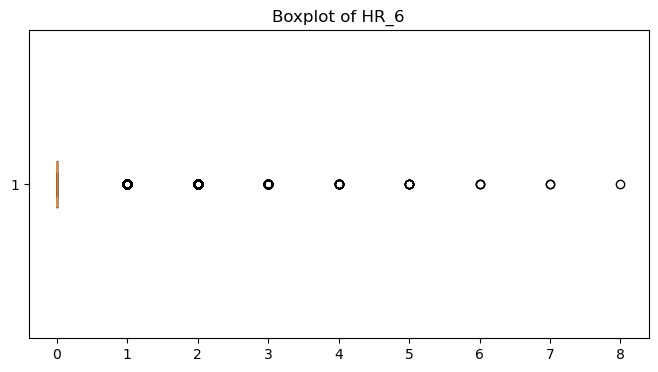

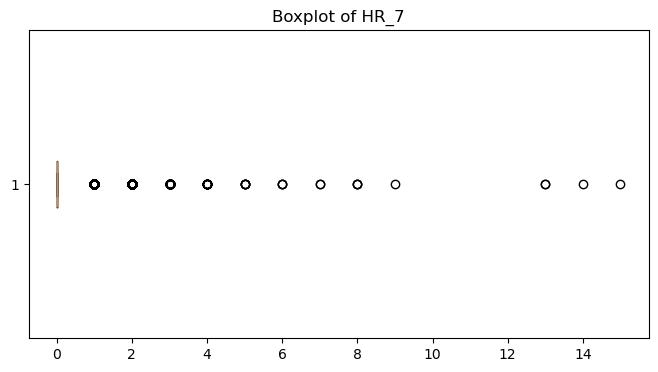

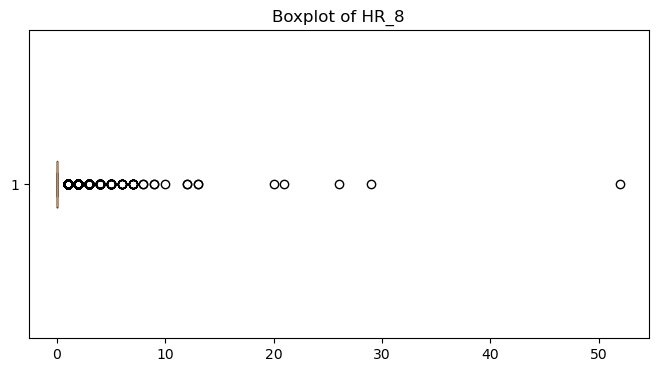

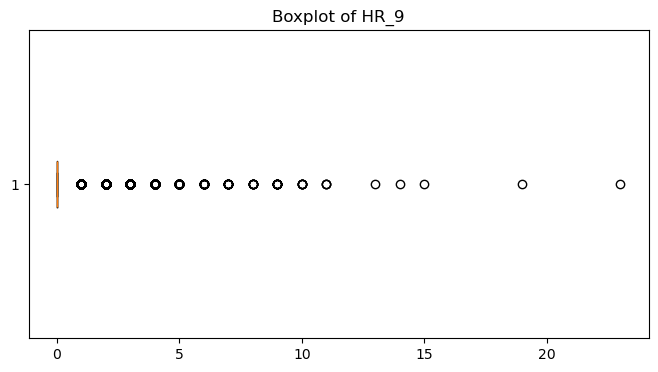

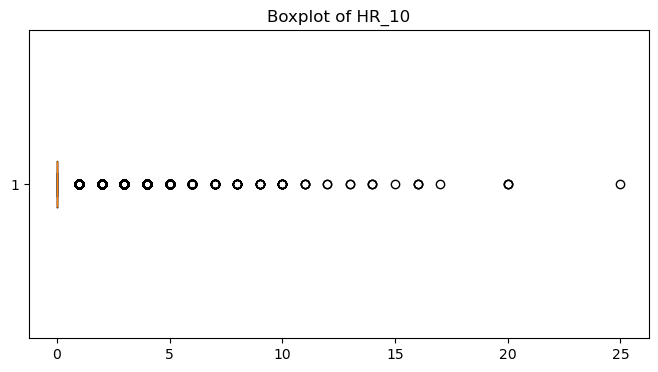

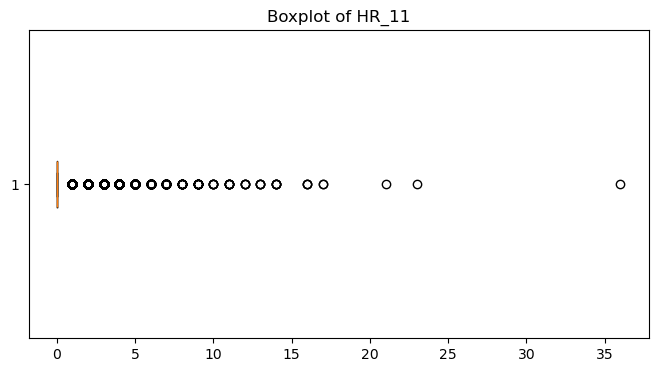

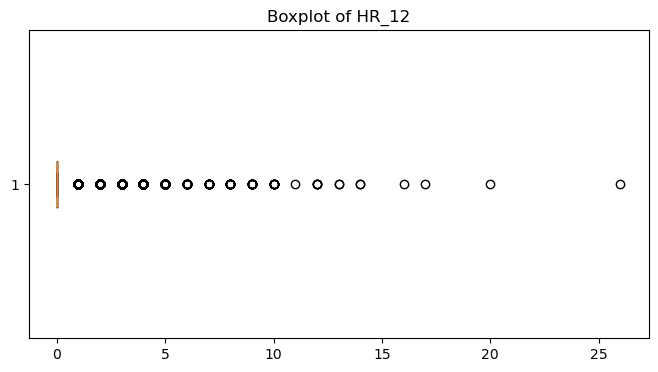

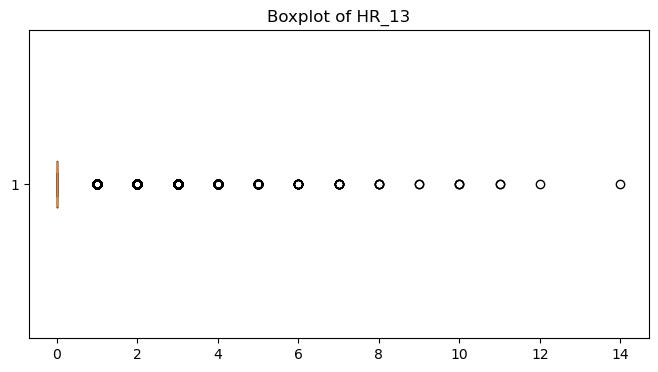

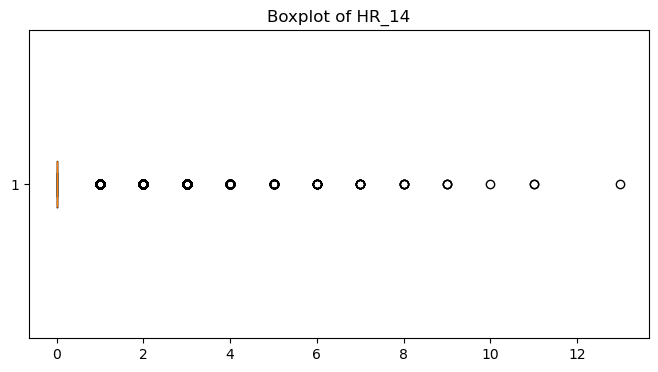

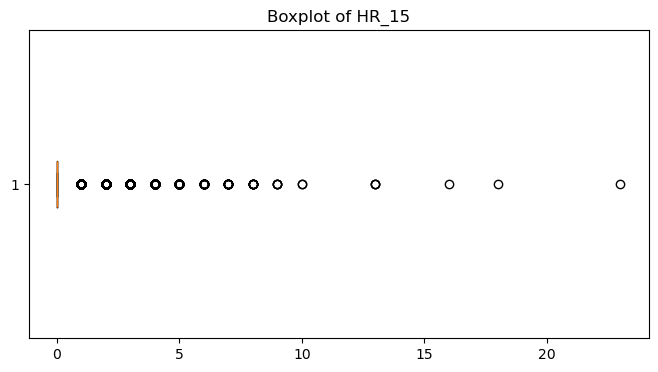

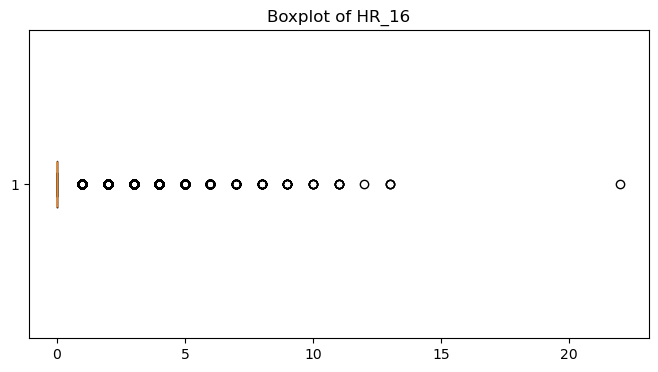

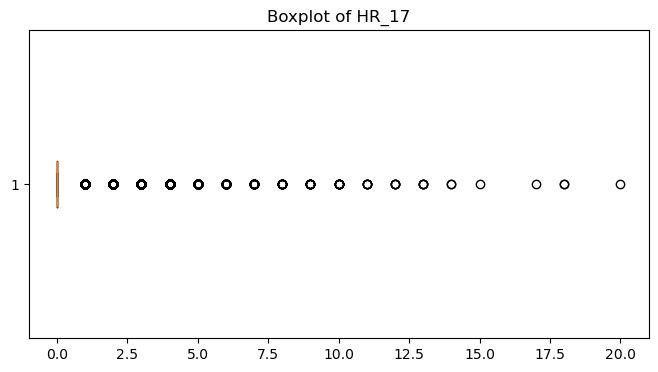

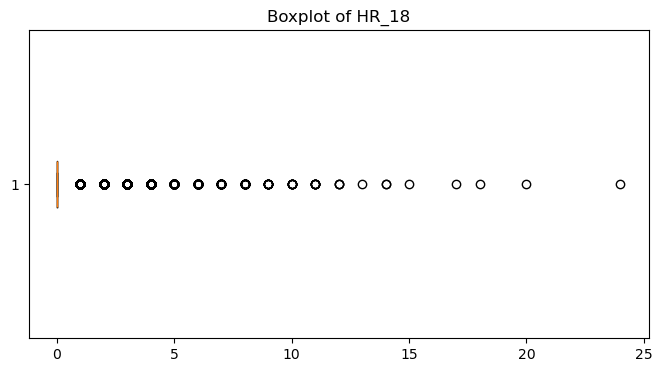

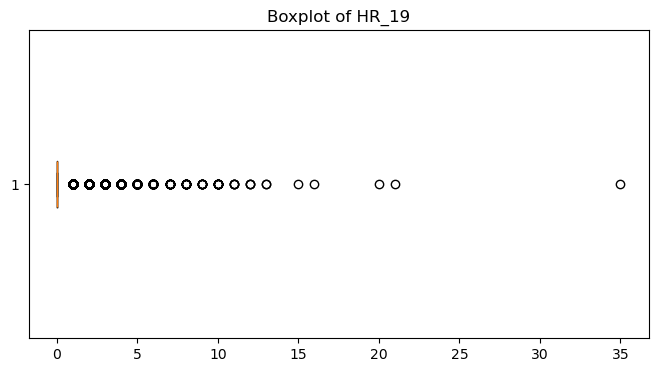

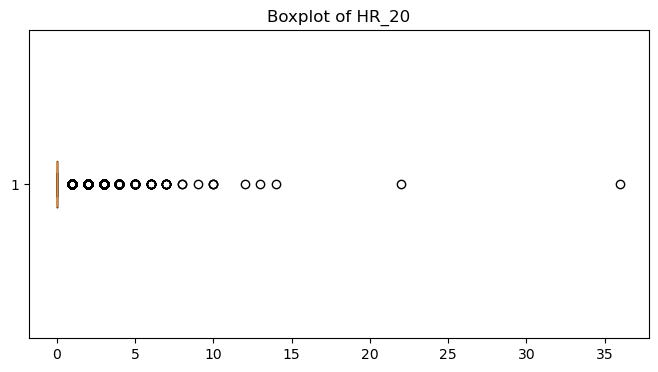

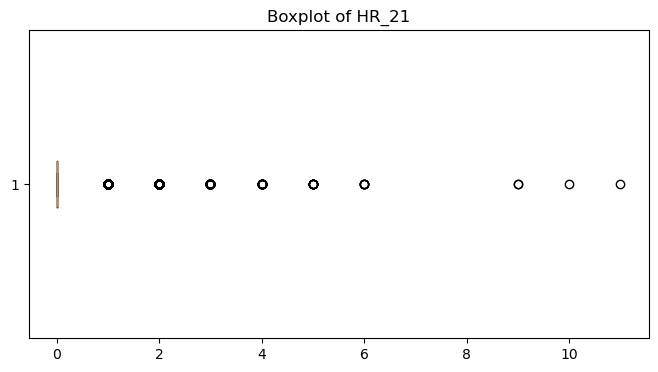

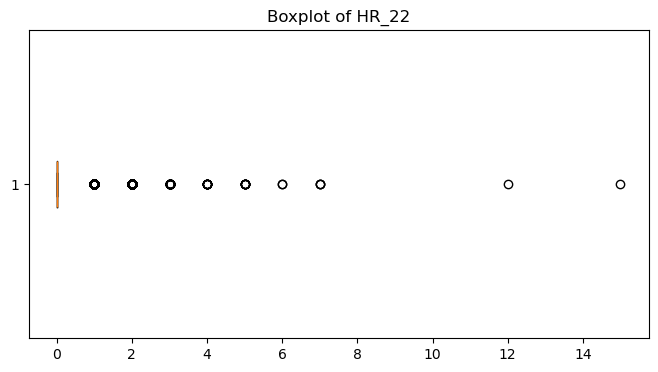

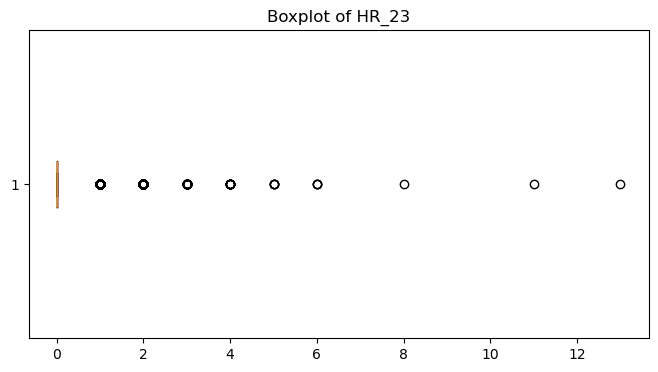

In [350]:
for var in number_var:
    plt.figure(figsize=(8, 4))
    plt.boxplot(data[var].dropna(), vert=False)
    plt.title(f"Boxplot of {var}")
    plt.show()

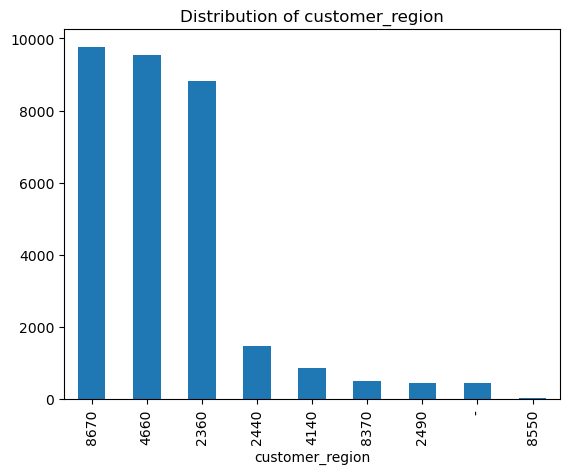

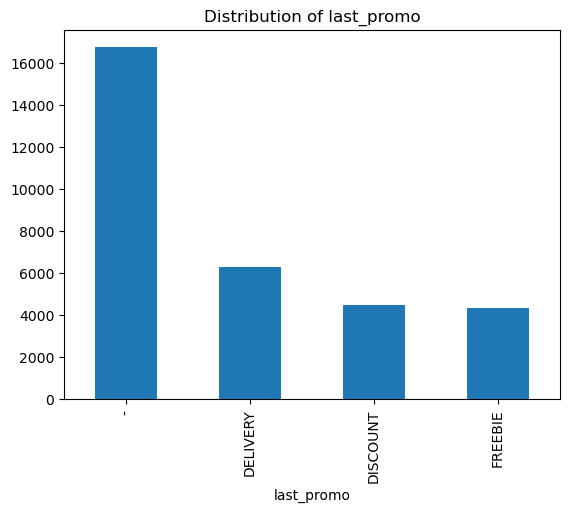

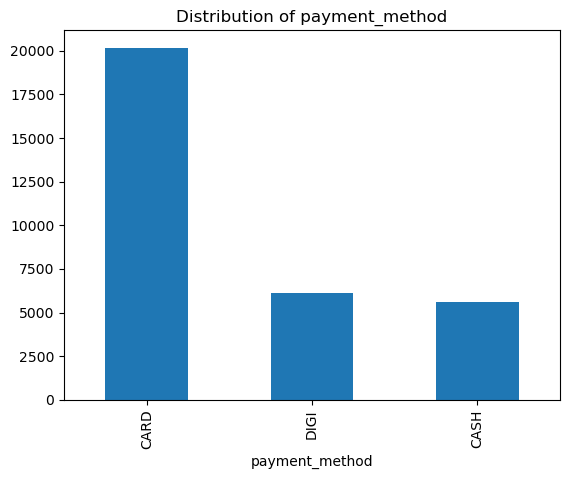

In [351]:
for var in category_var:
    data[var].value_counts().plot(kind='bar', title=f"Distribution of {var}")
    plt.show()

### 2.2 Correlation Analysis

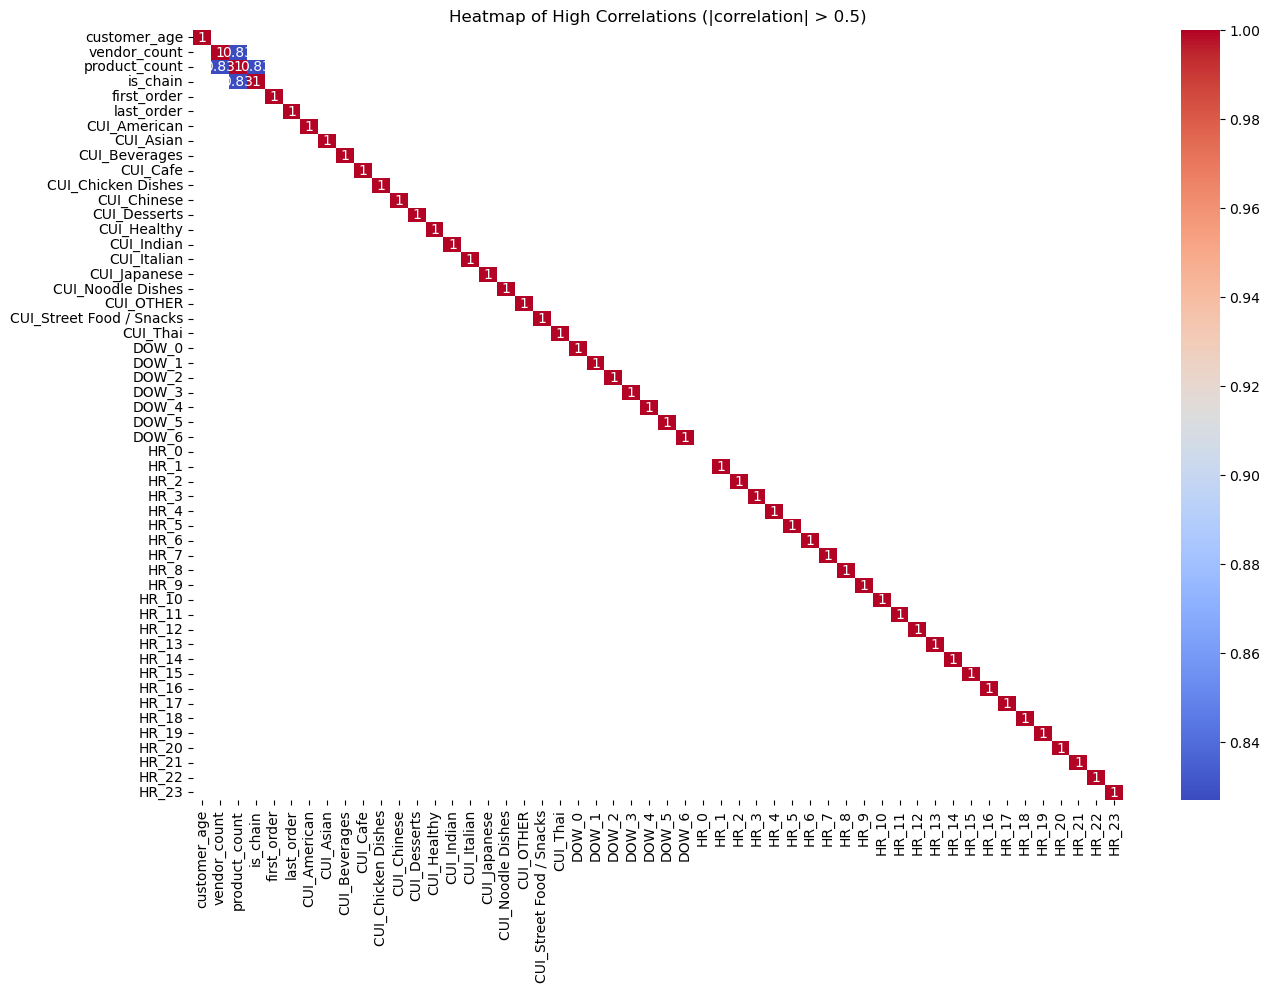

In [352]:
plt.figure(figsize=(15, 10))
corr = data[number_var].corr()
sns.heatmap(corr[(corr > 0.8) | (corr < -0.8)], annot=True, cmap='coolwarm', mask=(corr <= 0.8) & (corr >= -0.8))
plt.title("Heatmap of High Correlations (|correlation| > 0.5)")
plt.show()

### Table Correlation

In [353]:
correlation_matrix = data[number_var].corr()

high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= 0.8 or abs(correlation_matrix.iloc[i, j]) < -0.8: 
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Variable 1', 'Variable 2', 'Correlation'])

high_corr_df

,Variable 1,Variable 2,Correlation
0,product_count,vendor_count,0.827636
1,is_chain,product_count,0.827071


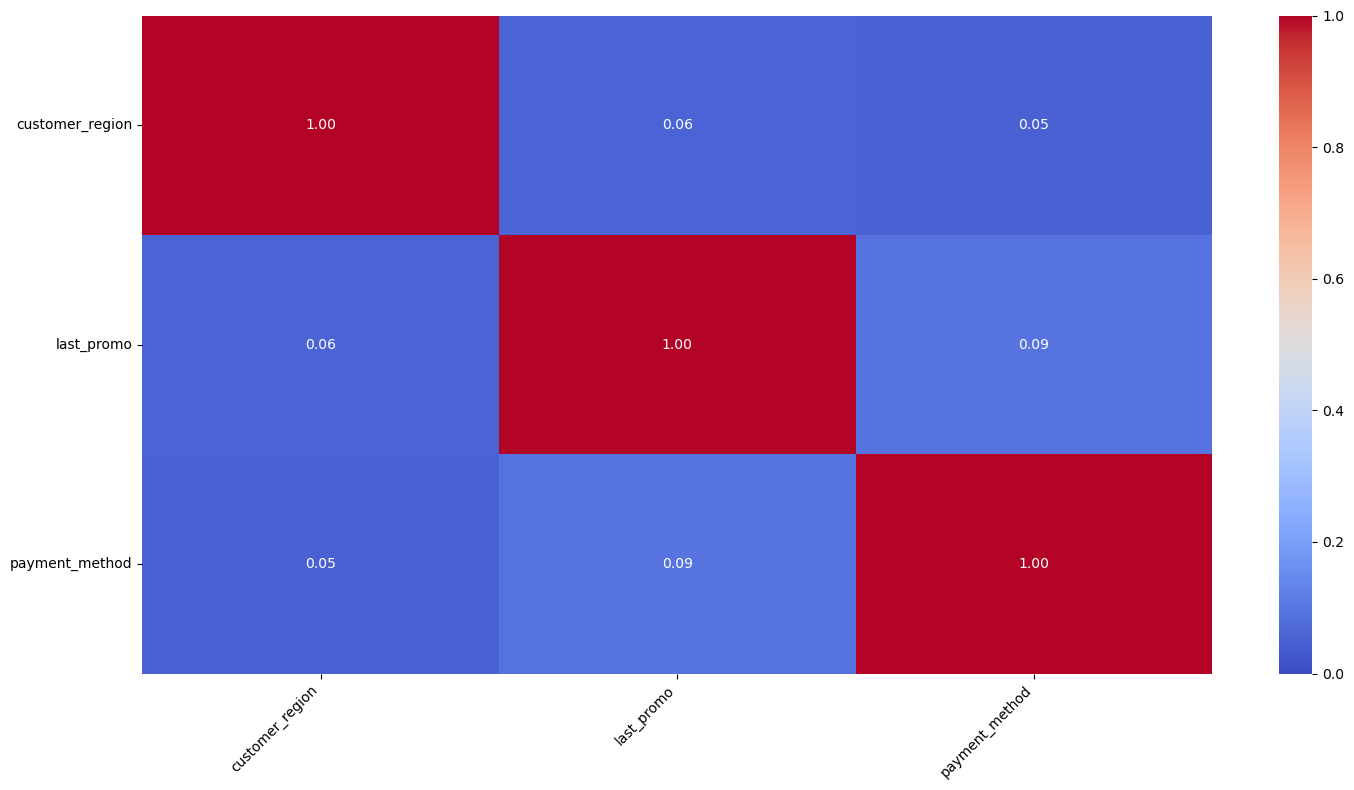

In [354]:
# Ensure data has all these columns
assert all(col in data.columns for col in category_var), "Some columns are missing in data"

def cramers_v(x, y):
    contingency_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(contingency_matrix)[0]
    n = contingency_matrix.sum().sum()
    r, k = contingency_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

correlation_matrix = pd.DataFrame(index=category_var, columns=category_var)

for col1 in category_var:
    for col2 in category_var:
        if col1 == col2:
            correlation_matrix.loc[col1, col2] = 1.0
        else:
            correlation_matrix.loc[col1, col2] = cramers_v(
                data[col1].round(3),
                data[col2].round(3)
            )

correlation_matrix = correlation_matrix.astype(float)

plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix,annot=True, fmt=".2f",cmap="coolwarm",vmin=0, vmax=1,cbar=True,)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### 2.3 Trend Analysis

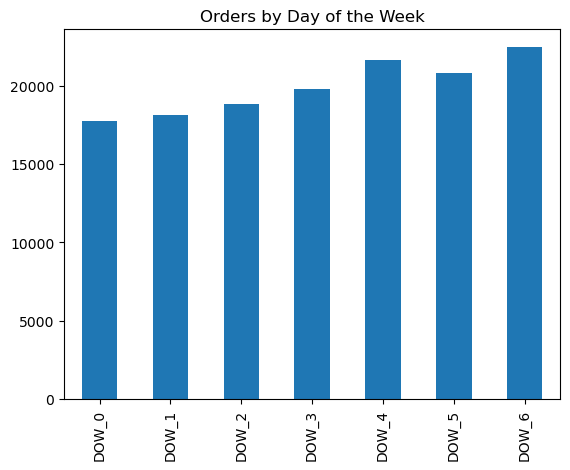

In [355]:
dow_data = data[[f'DOW_{i}' for i in range(7)]].sum()
dow_data.plot(kind='bar', title="Orders by Day of the Week")
plt.show()

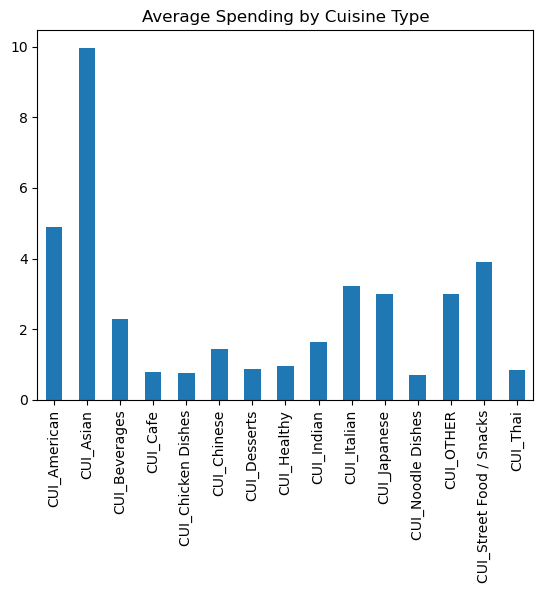

In [356]:
data[[col for col in number_var if 'CUI_' in col]].mean().plot(kind='bar')
plt.title("Average Spending by Cuisine Type")
plt.show()

# Outliers

In [357]:
z_scores = data[number_var].apply(zscore)
outliers = (z_scores.abs() > 3).sum()
print("Outliers per variable:")
print(outliers)

Outliers per variable:
customer_age                1048
vendor_count                 623
product_count                624
is_chain                     604
first_order                    0
last_order                     0
CUI_American                 636
CUI_Asian                    618
CUI_Beverages                591
CUI_Cafe                     344
CUI_Chicken Dishes           549
CUI_Chinese                  374
CUI_Desserts                 617
CUI_Healthy                  462
CUI_Indian                   527
CUI_Italian                  559
CUI_Japanese                 545
CUI_Noodle Dishes            433
CUI_OTHER                    556
CUI_Street Food / Snacks     642
CUI_Thai                     562
DOW_0                        657
DOW_1                        685
DOW_2                        694
DOW_3                        744
DOW_4                        777
DOW_5                        728
DOW_6                        486
HR_0                           0
HR_1                

## Outliers Removal

In [358]:
print(data.isnull().sum())

customer_id                 0
customer_region             0
customer_age                0
vendor_count                0
product_count               0
is_chain                    0
first_order                 0
last_order                  0
last_promo                  0
payment_method              0
CUI_American                0
CUI_Asian                   0
CUI_Beverages               0
CUI_Cafe                    0
CUI_Chicken Dishes          0
CUI_Chinese                 0
CUI_Desserts                0
CUI_Healthy                 0
CUI_Indian                  0
CUI_Italian                 0
CUI_Japanese                0
CUI_Noodle Dishes           0
CUI_OTHER                   0
CUI_Street Food / Snacks    0
CUI_Thai                    0
DOW_0                       0
DOW_1                       0
DOW_2                       0
DOW_3                       0
DOW_4                       0
DOW_5                       0
DOW_6                       0
HR_0                        0
HR_1      

In [359]:
def outliers_removal(data, number_var):
    for col in number_var:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data[col] = data[col].where((data[col] >= lower_bound) & (data[col] <= upper_bound), np.nan)
        
    return data

In [360]:
outliers_removal(data, number_var)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2.0,5.0,1.0,0.0,1.0,DELIVERY,DIGI,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
1,5d272b9dcb,8670,17.0,2.0,2.0,2.0,0.0,1.0,DISCOUNT,DIGI,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,f6d1b2ba63,4660,38.0,1.0,2.0,2.0,0.0,1.0,DISCOUNT,CASH,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,180c632ed8,4660,NaN,2.0,3.0,1.0,0.0,2.0,DELIVERY,DIGI,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4eb37a6705,4660,20.0,2.0,5.0,0.0,0.0,2.0,-,DIGI,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31883,f4e366c281,8670,30.0,1.0,1.0,1.0,3.0,0.0,FREEBIE,DIGI,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31884,f6b6709018,8670,NaN,1.0,1.0,0.0,5.6,0.0,DELIVERY,DIGI,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31885,f74ad8ce3f,8670,24.0,1.0,1.0,1.0,5.6,0.0,-,DIGI,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31886,f7b19c0241,8670,34.0,1.0,1.0,0.0,2.4,0.0,DISCOUNT,DIGI,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [361]:
print(data.isnull().sum())

customer_id                    0
customer_region                0
customer_age                1653
vendor_count                1524
product_count               2371
is_chain                    3155
first_order                    0
last_order                     0
last_promo                     0
payment_method                 0
CUI_American                3511
CUI_Asian                   3475
CUI_Beverages               5435
CUI_Cafe                    1366
CUI_Chicken Dishes          3248
CUI_Chinese                 3522
CUI_Desserts                2016
CUI_Healthy                 2169
CUI_Indian                  3448
CUI_Italian                 6448
CUI_Japanese                6301
CUI_Noodle Dishes           2226
CUI_OTHER                   7041
CUI_Street Food / Snacks    4249
CUI_Thai                    2378
DOW_0                       1406
DOW_1                       1495
DOW_2                       1589
DOW_3                       1654
DOW_4                       1784
DOW_5     

## Missing Values Treatment after Outlier removal

In [362]:
data[number_var] = knn_imputer.fit_transform(data[number_var])
print(data.isnull().sum())

customer_id                 0
customer_region             0
customer_age                0
vendor_count                0
product_count               0
is_chain                    0
first_order                 0
last_order                  0
last_promo                  0
payment_method              0
CUI_American                0
CUI_Asian                   0
CUI_Beverages               0
CUI_Cafe                    0
CUI_Chicken Dishes          0
CUI_Chinese                 0
CUI_Desserts                0
CUI_Healthy                 0
CUI_Indian                  0
CUI_Italian                 0
CUI_Japanese                0
CUI_Noodle Dishes           0
CUI_OTHER                   0
CUI_Street Food / Snacks    0
CUI_Thai                    0
DOW_0                       0
DOW_1                       0
DOW_2                       0
DOW_3                       0
DOW_4                       0
DOW_5                       0
DOW_6                       0
HR_0                        0
HR_1      

## Outliers Check After Treatment

In [363]:
def detect_outliers_iqr(df, missing_threshold=5):
    results = {'columns_with_outliers': [], 'outlier_counts': {}, 'bounds': {}}
    
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outlier_data = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_percent = len(outlier_data) / len(df) * 100

        # Store results
        results['bounds'][column] = {'lower_bound': lower_bound, 'upper_bound': upper_bound}
        results['outlier_counts'][column] = len(outlier_data)
        if outlier_percent > missing_threshold:
            results['columns_with_outliers'].append(column)
        
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=df, x=column, color='orange', showfliers=False)
        sns.stripplot(data=outlier_data, x=column, color='red', jitter=True, label='Outliers')
        plt.title(f'Boxplot with Outliers for {column}')
        plt.legend()
        plt.show()
    
    print("Columns with more than {}% outliers:".format(missing_threshold))
    print(results['columns_with_outliers'])
    
    return results

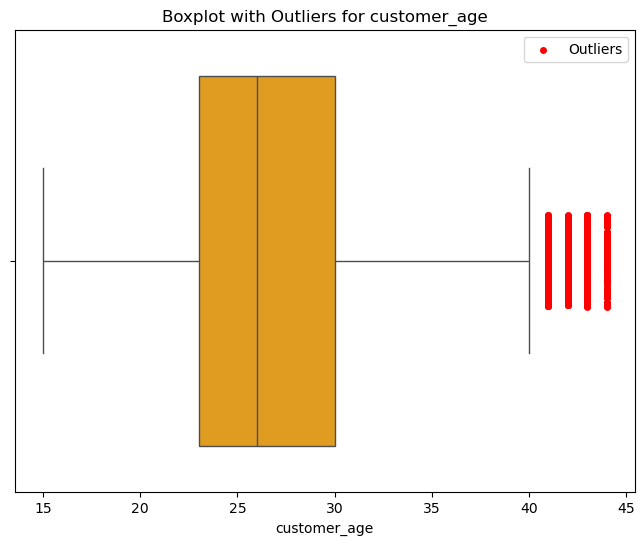

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


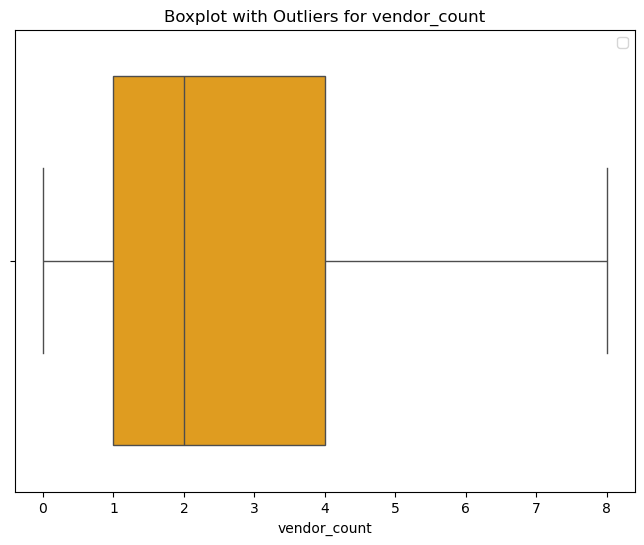

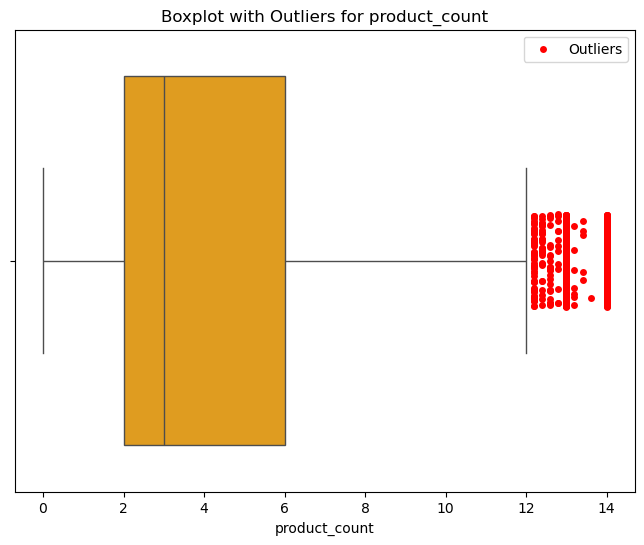

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


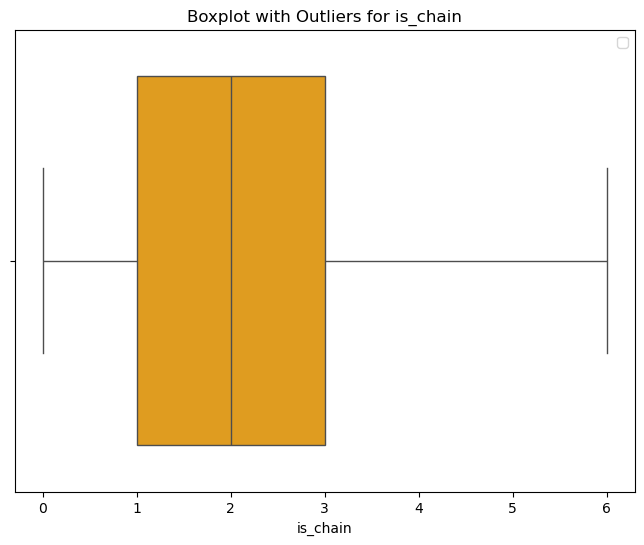

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


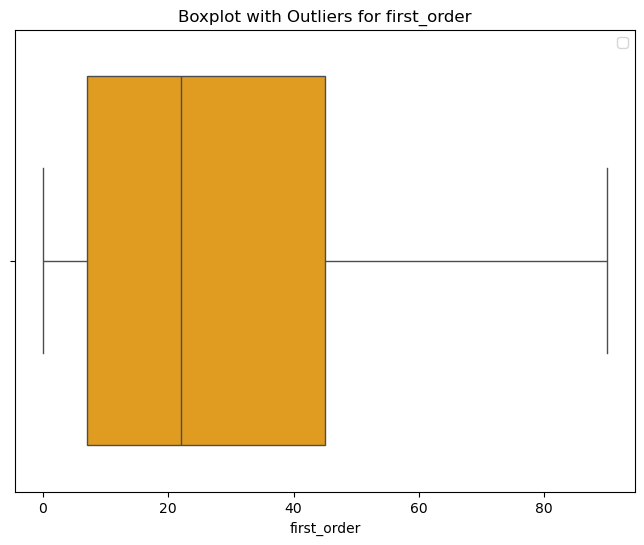

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


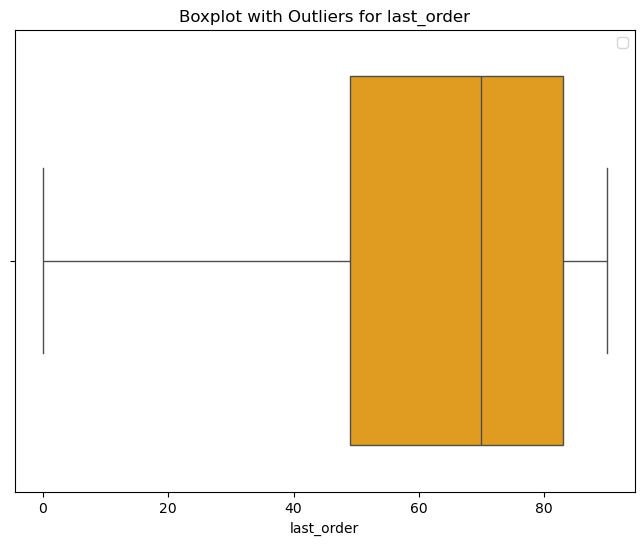

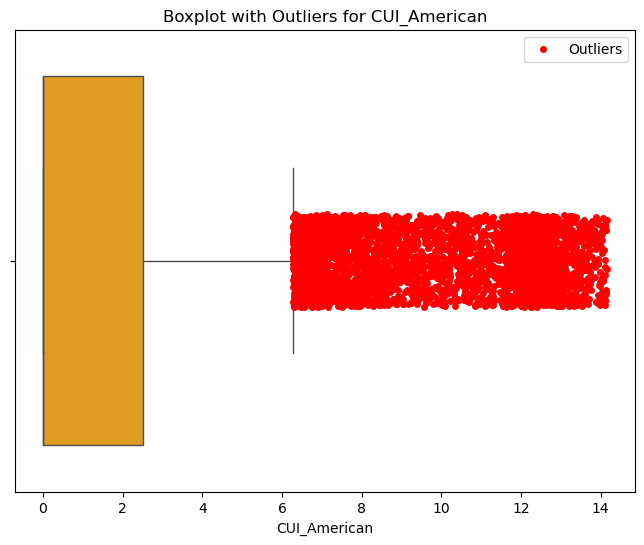

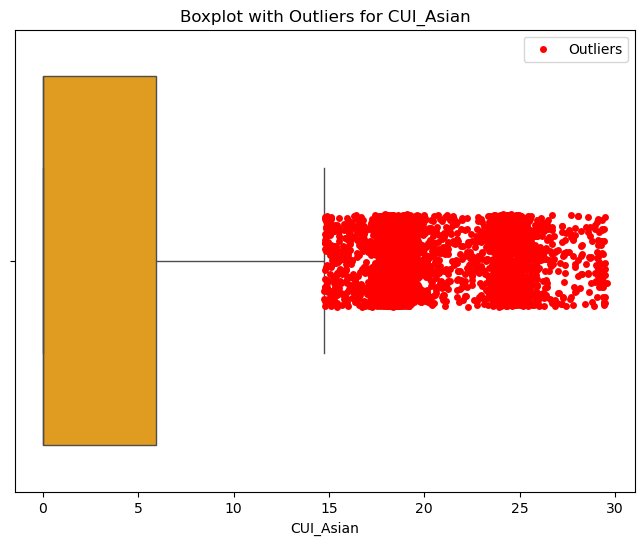

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


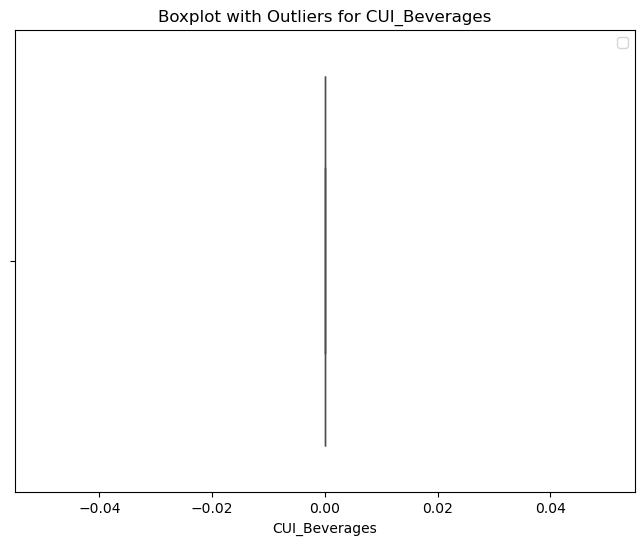

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


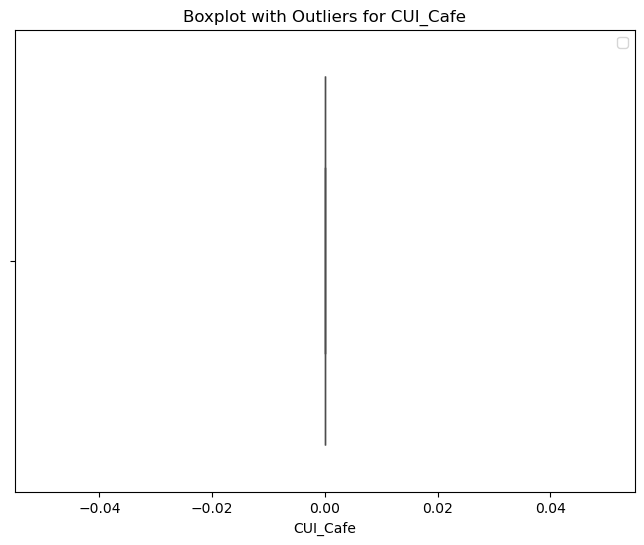

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


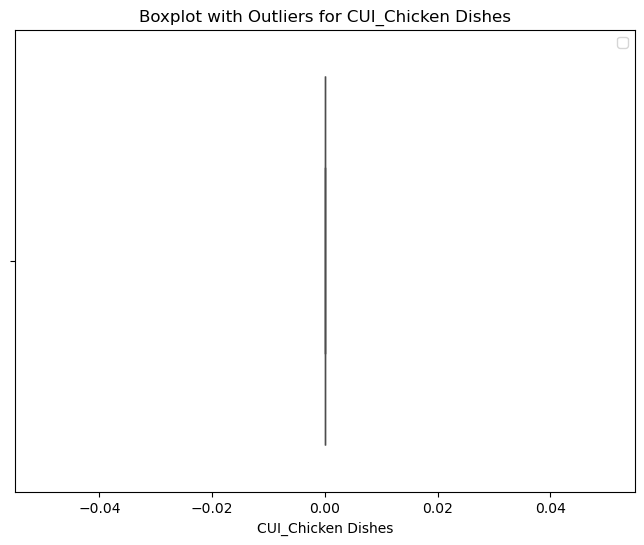

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


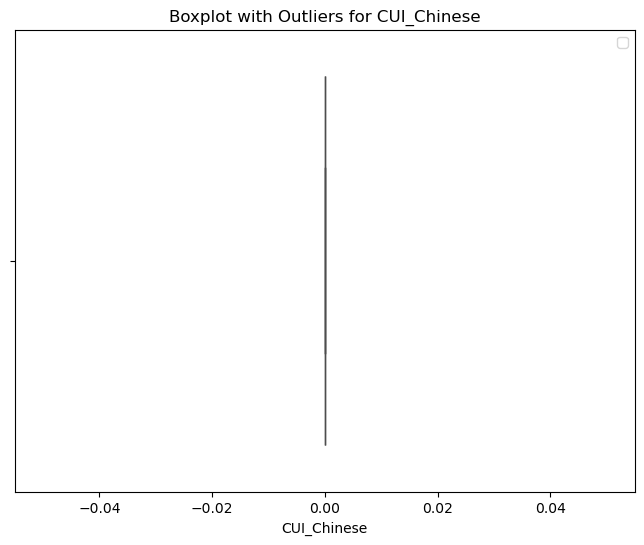

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


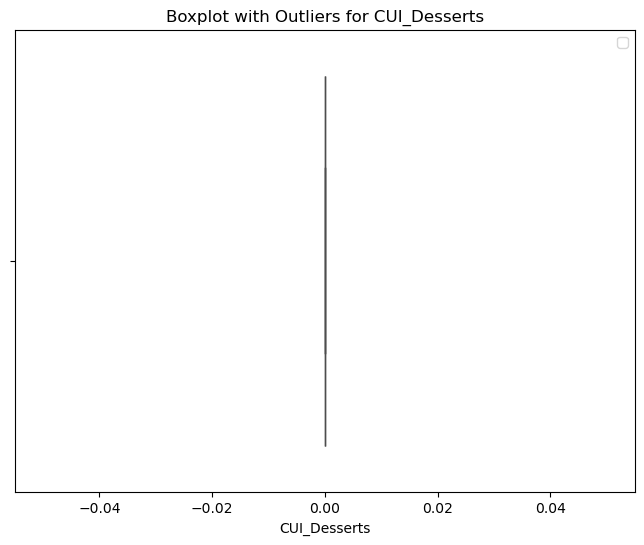

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


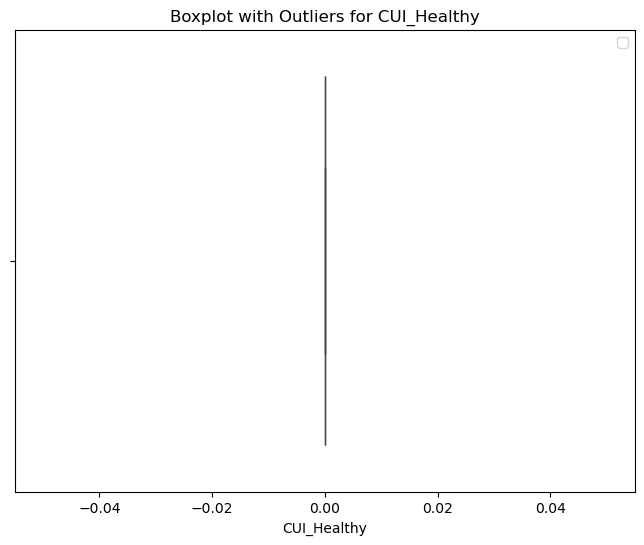

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


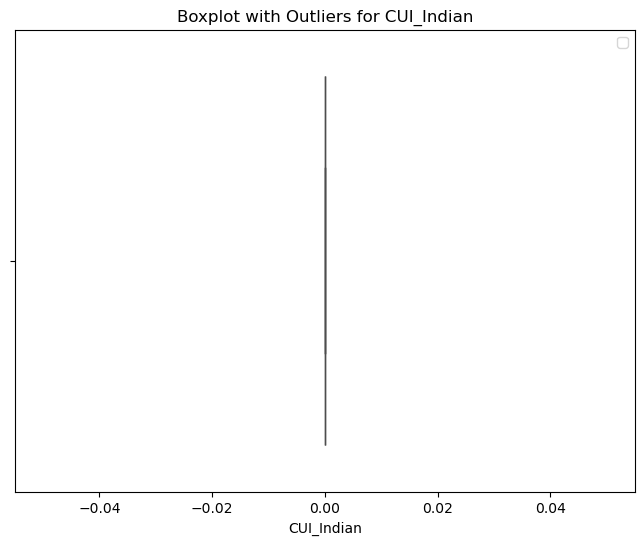

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


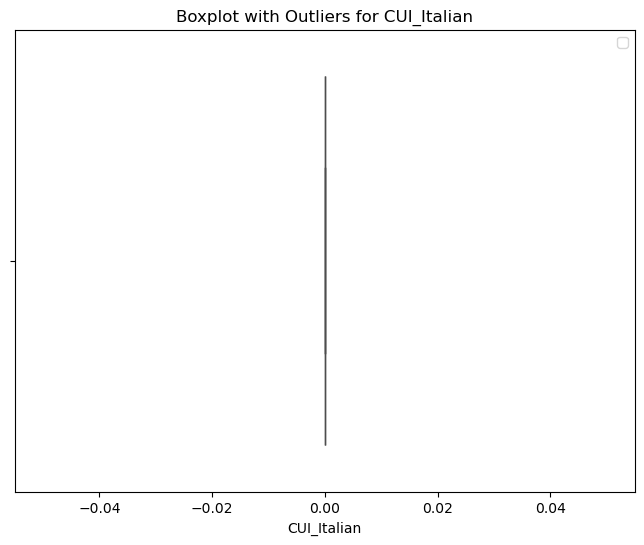

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


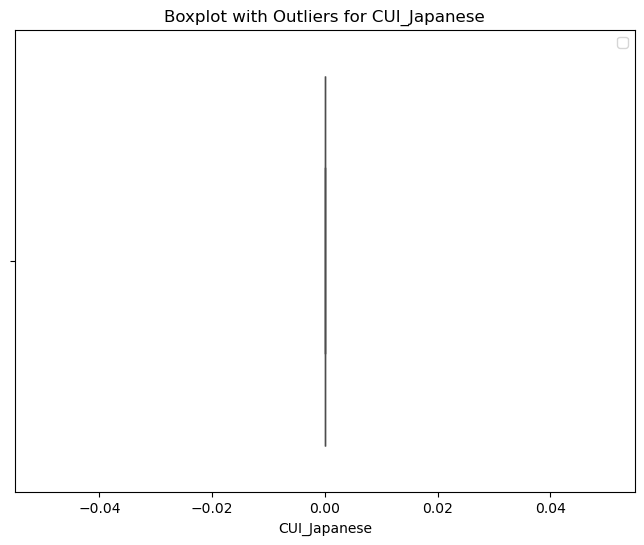

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


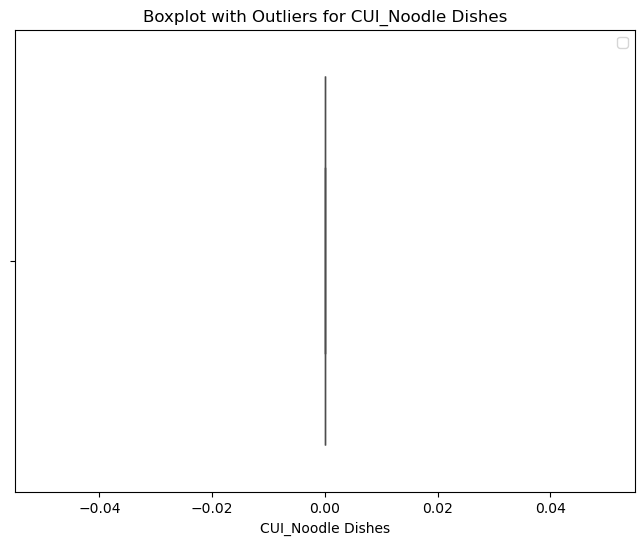

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


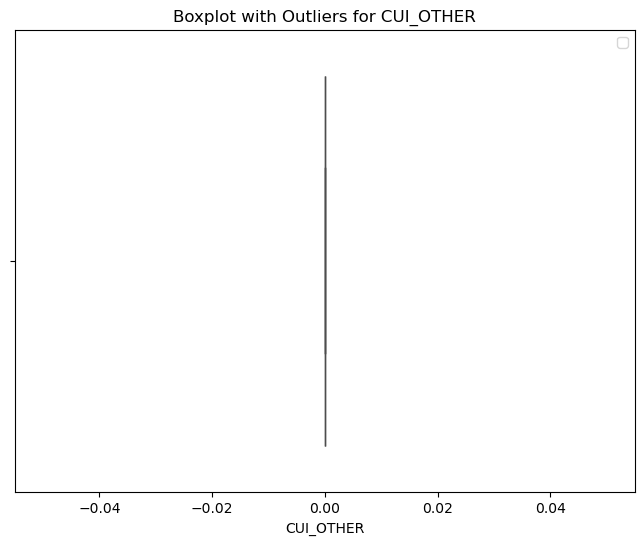

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


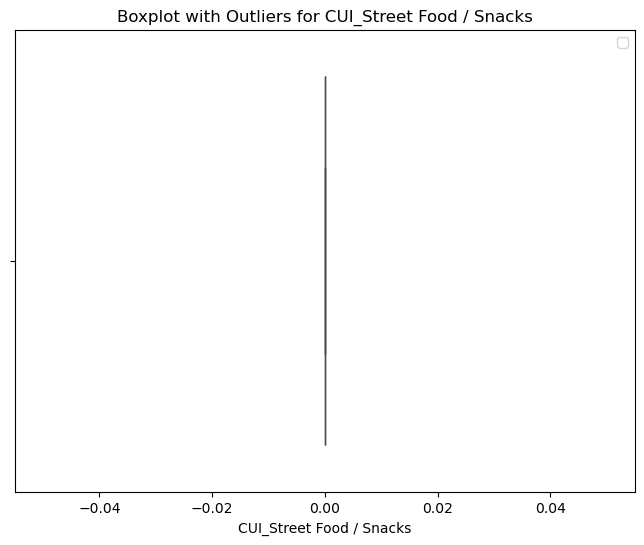

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


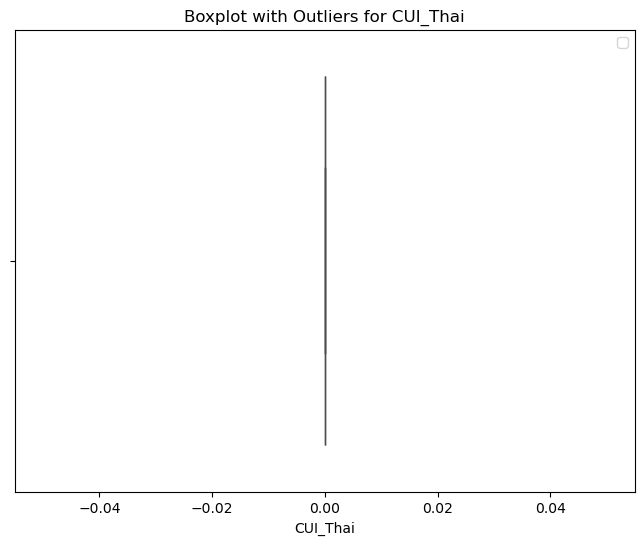

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


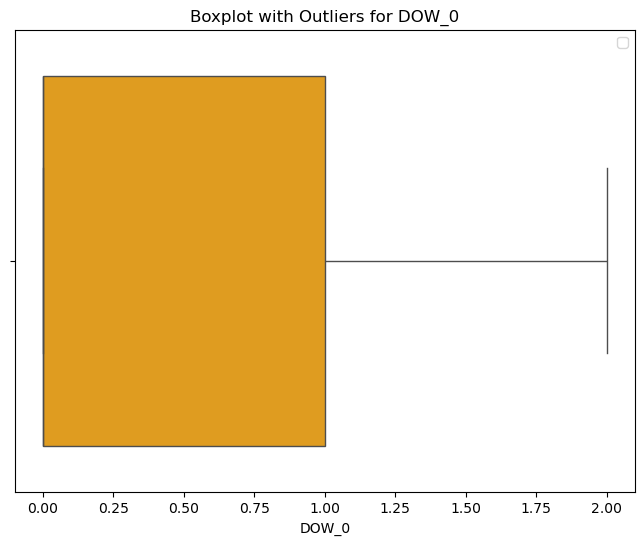

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


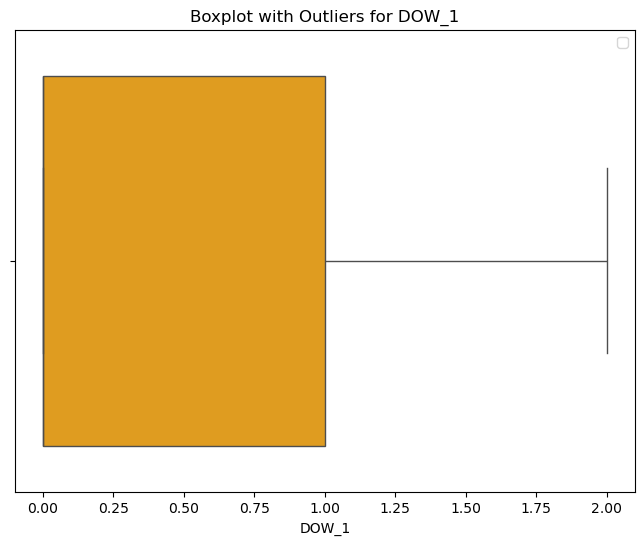

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


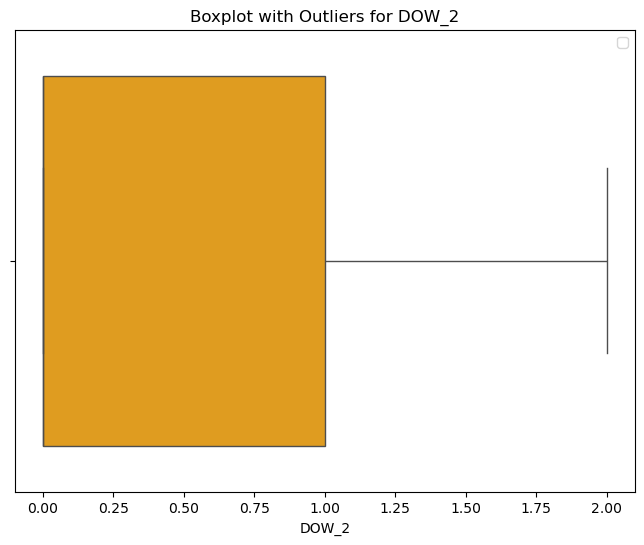

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


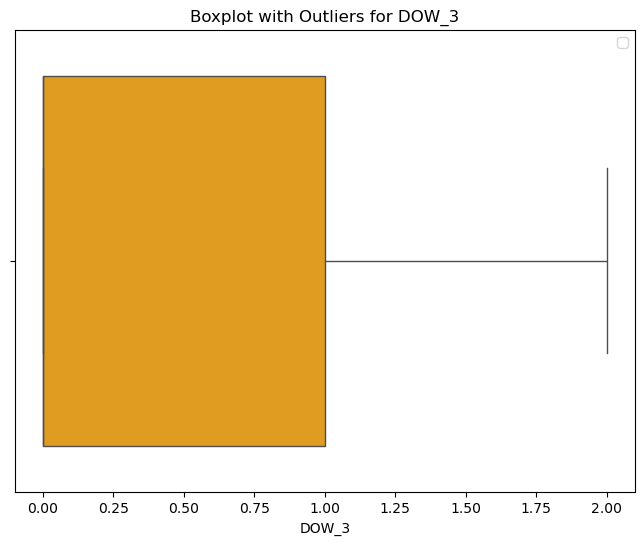

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


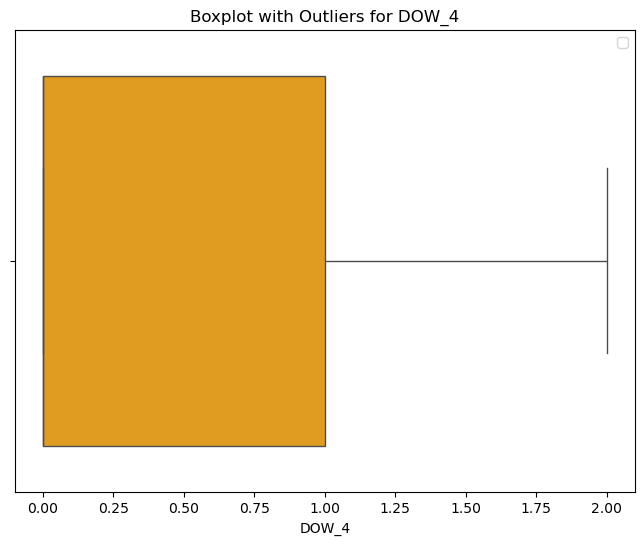

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


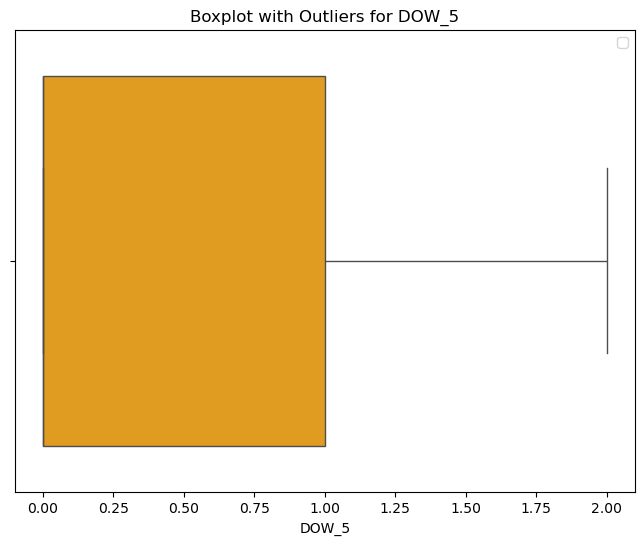

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


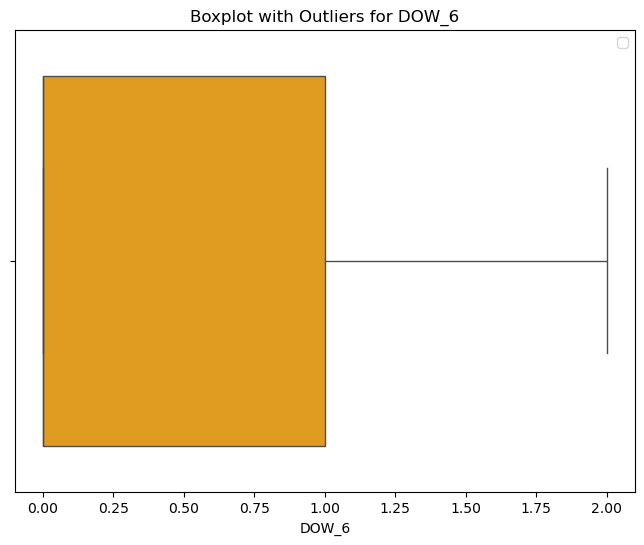

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


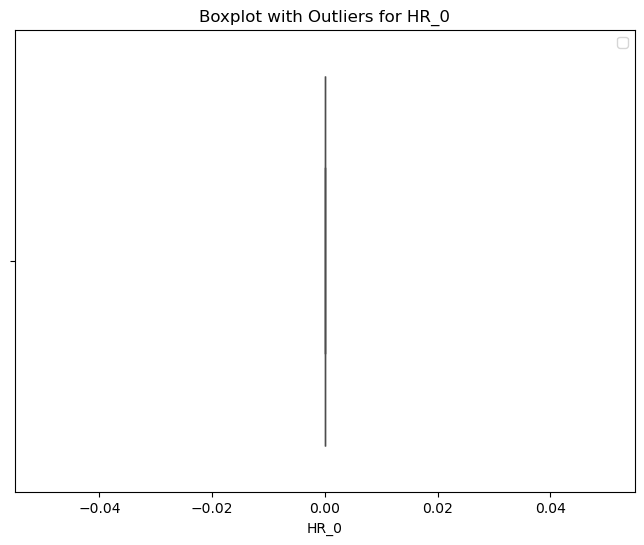

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


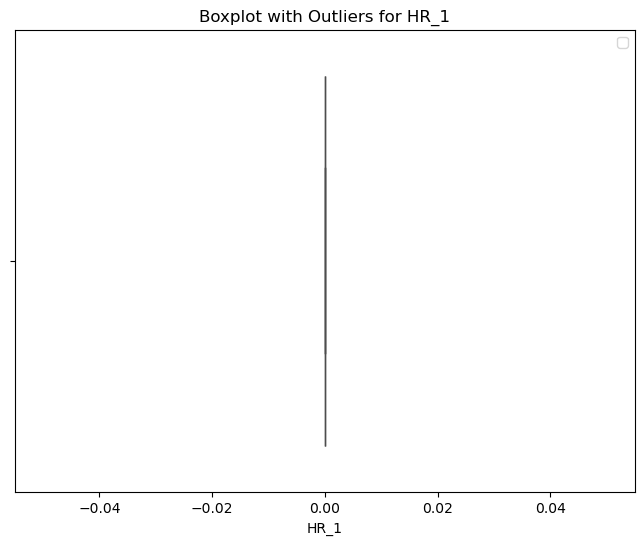

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


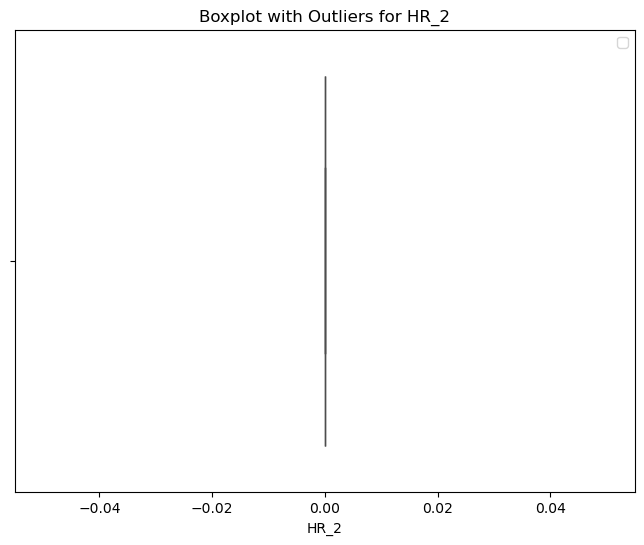

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


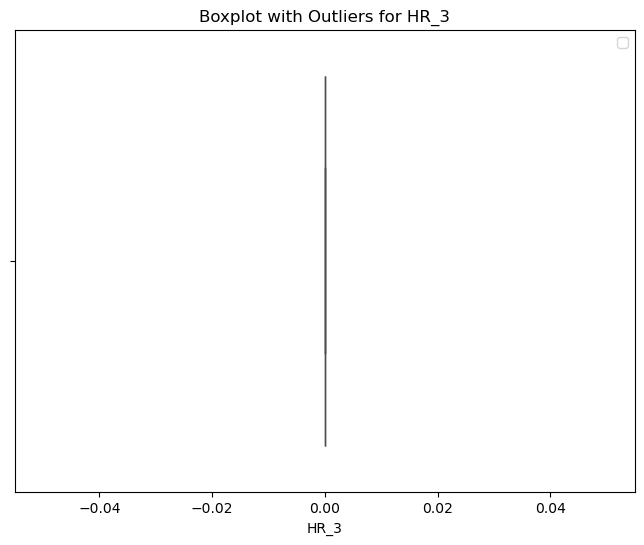

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


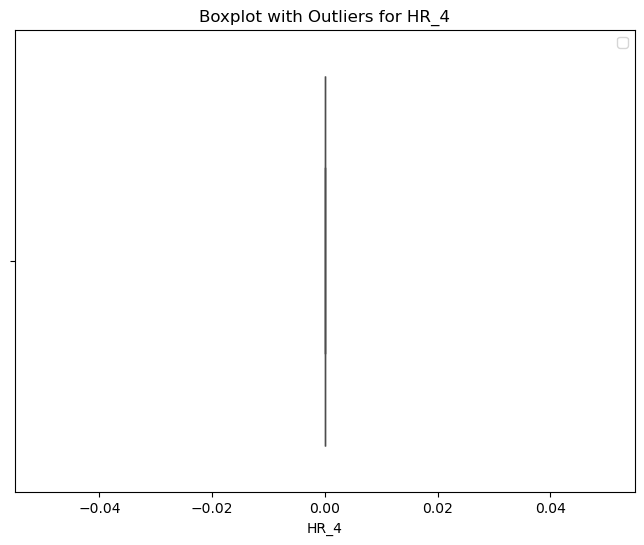

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


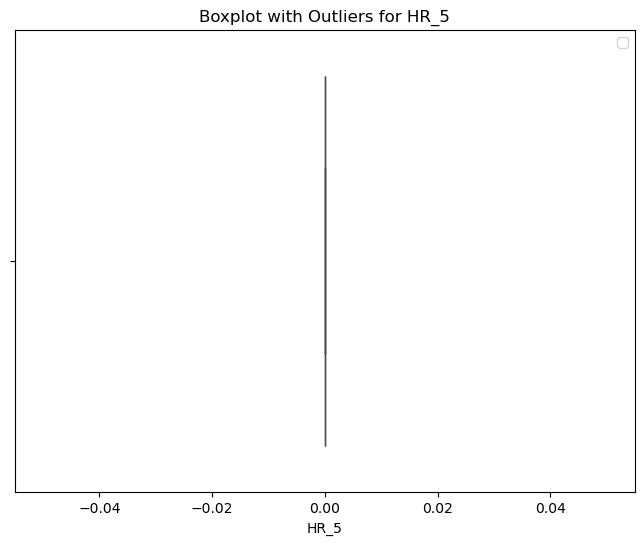

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


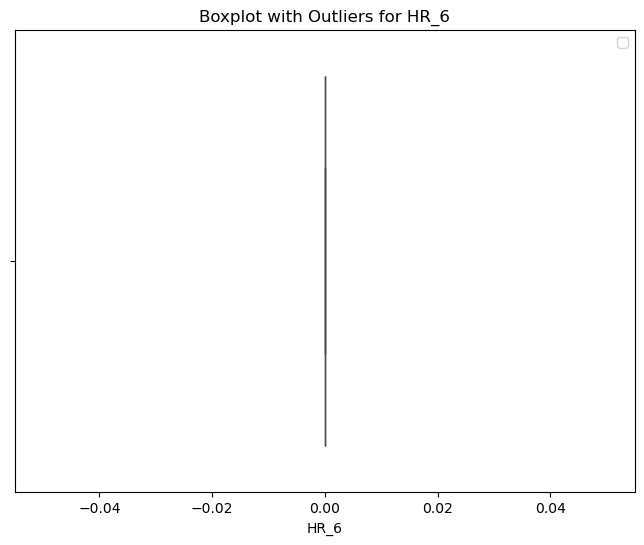

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


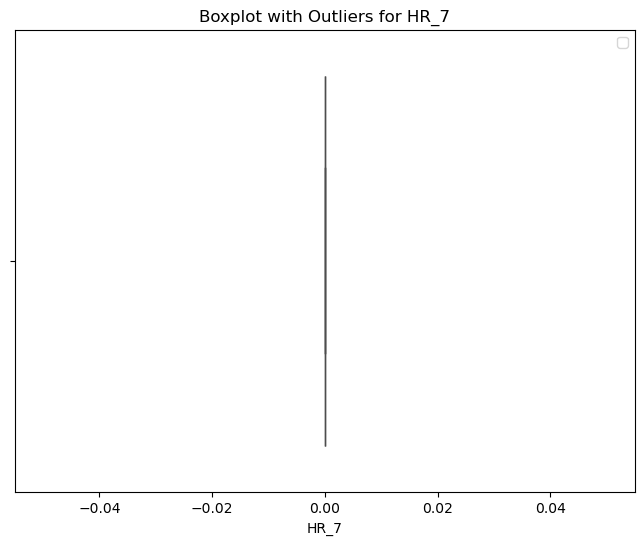

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


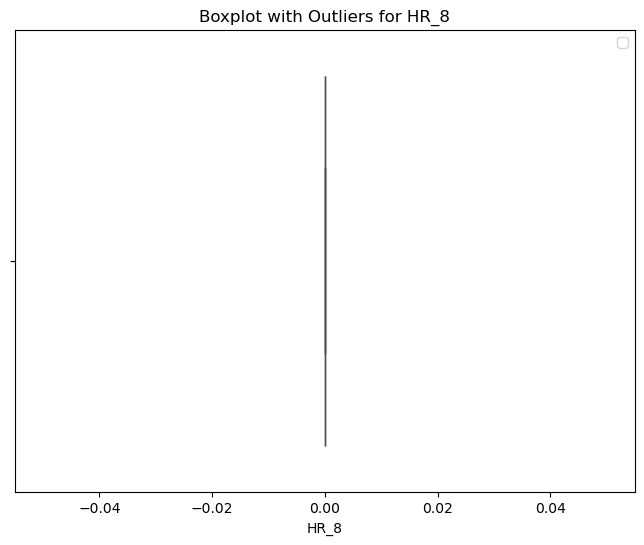

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


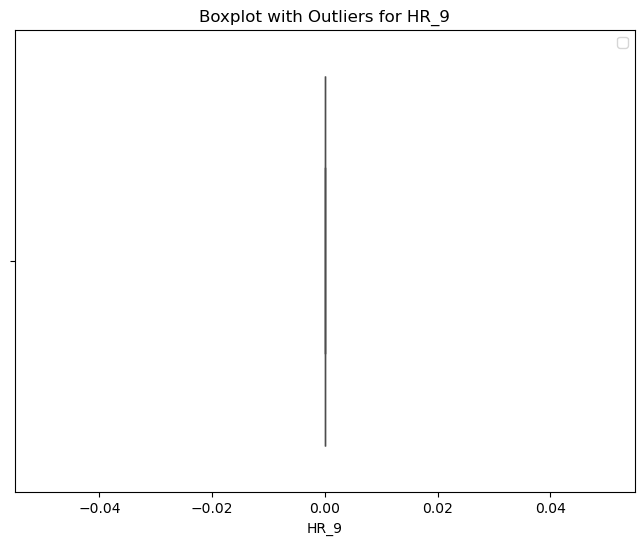

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


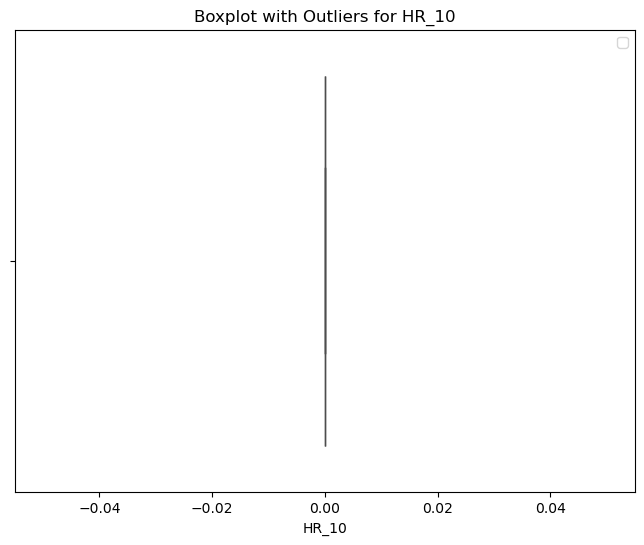

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


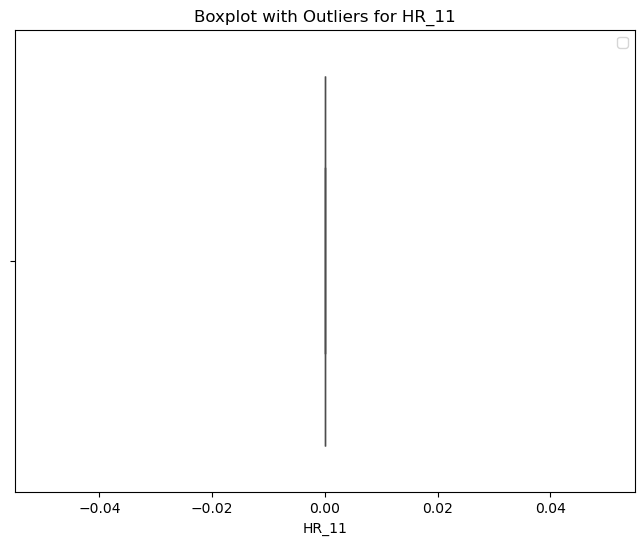

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


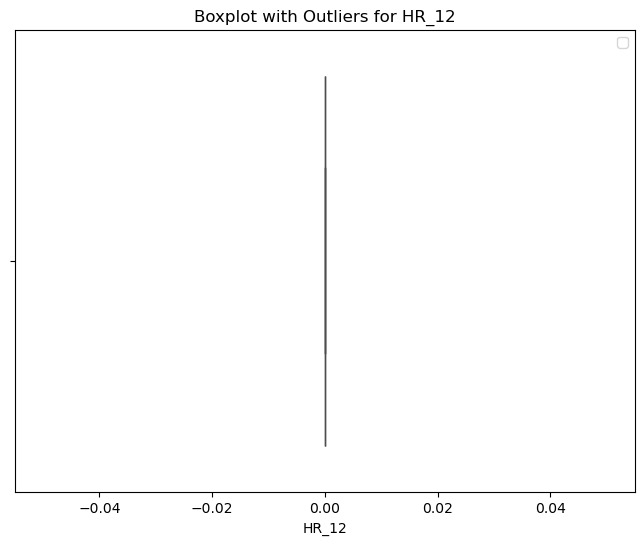

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


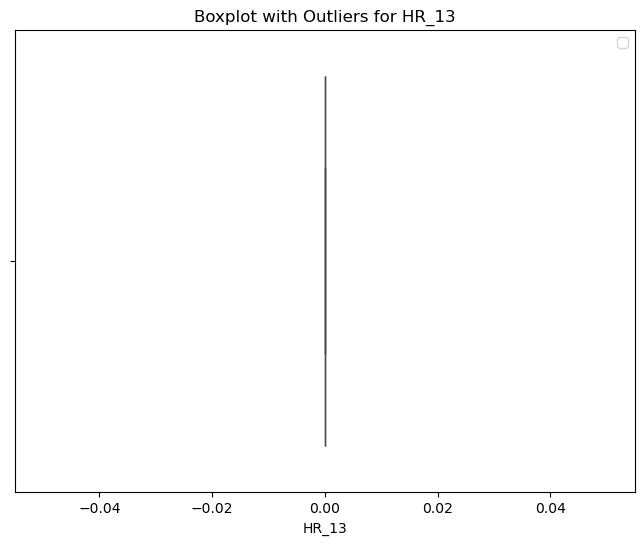

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


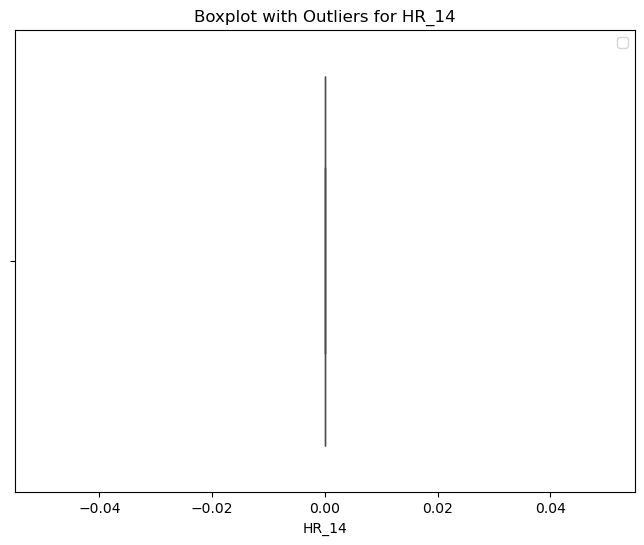

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


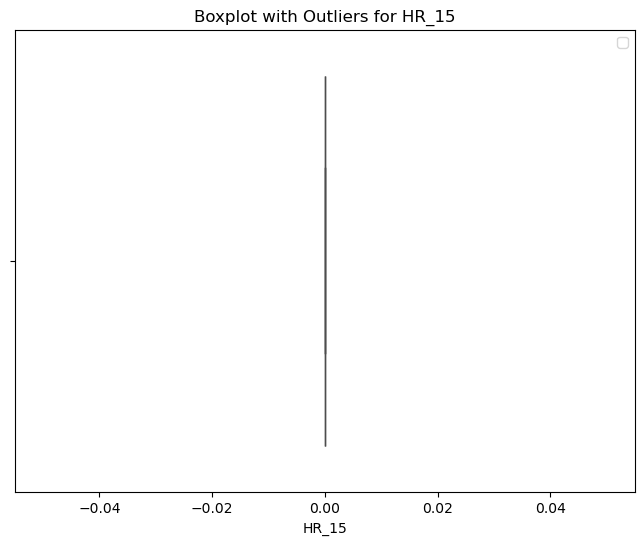

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


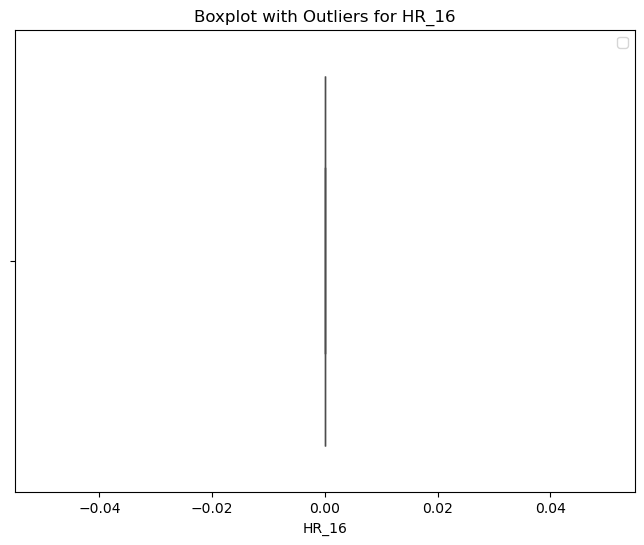

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


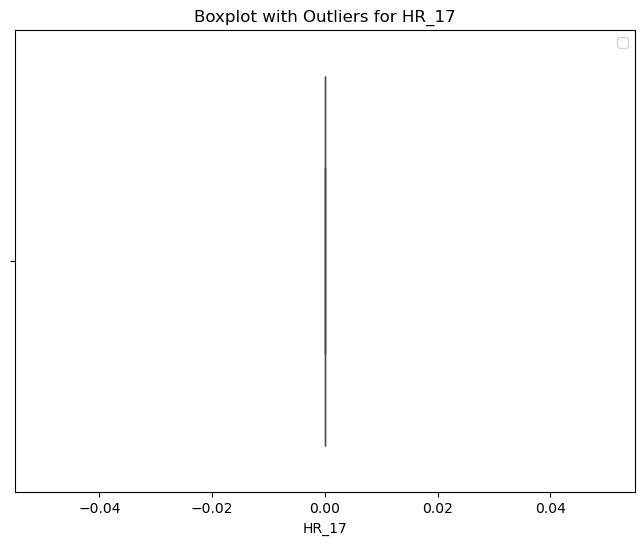

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


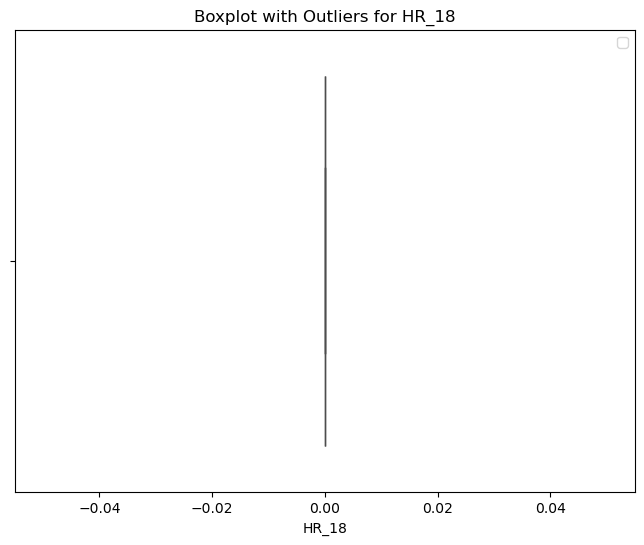

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


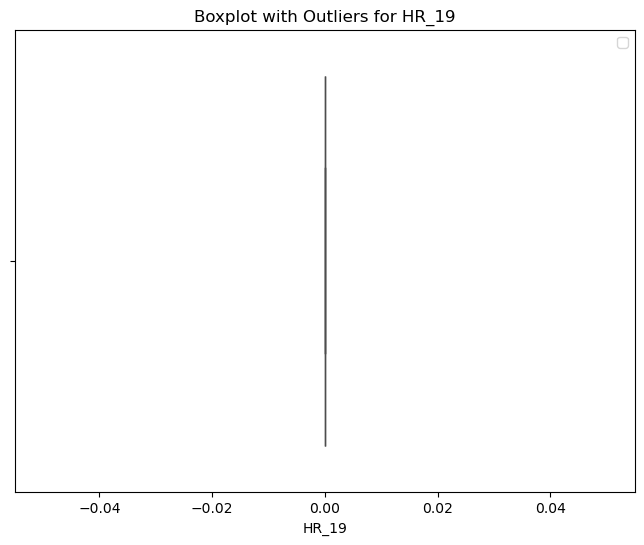

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


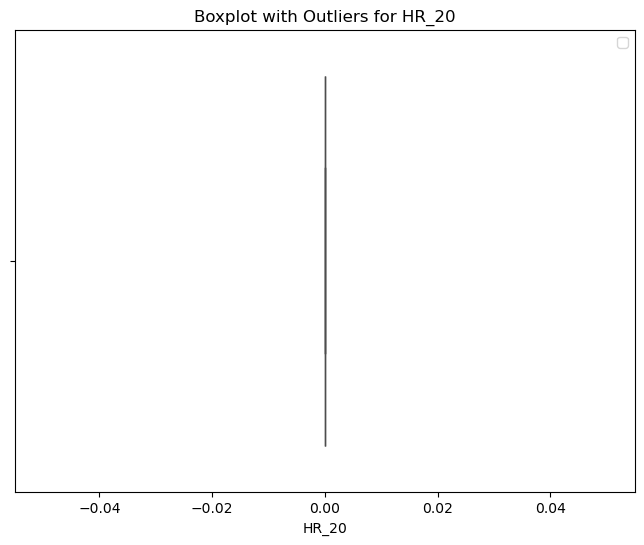

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


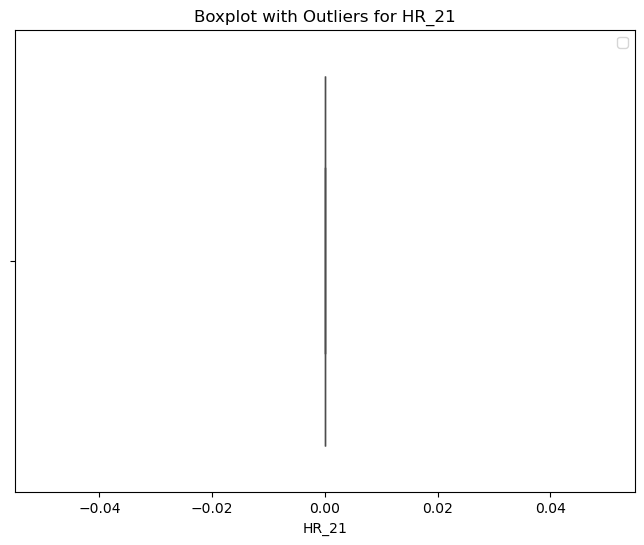

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


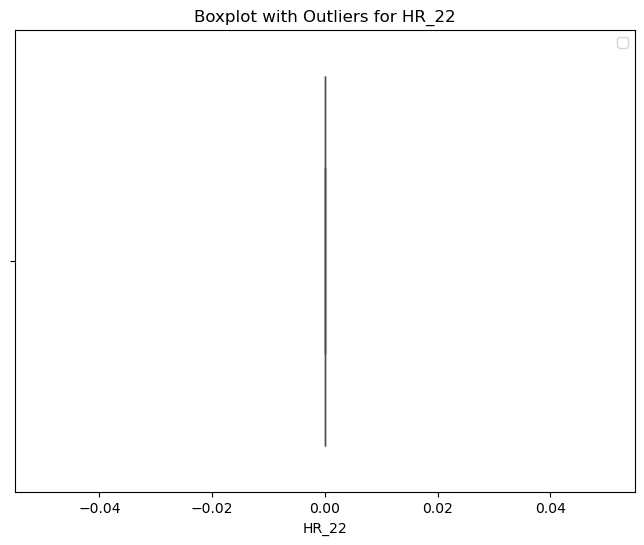

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


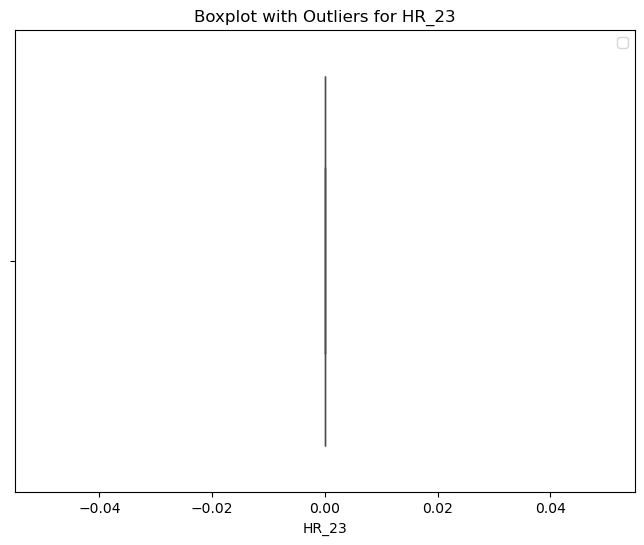

Columns with more than 5% outliers:
['CUI_American', 'CUI_Asian']


In [364]:
outlier_results = detect_outliers_iqr(data, missing_threshold=5)

# Create New Features

In [320]:
data['total_spending'] = data[[col for col in number_var if col.startswith('CUI_')]].sum(axis=1)
number_var.append("total_spending")

In [321]:
data['avg_spending_per_cuisine'] = data['total_spending'] / data['vendor_count'].replace(0, 1)
number_var.append("avg_spending_per_cuisine")

In [322]:
data['order_activity_duration'] = data['last_order'] - data['first_order']
number_var.append("order_activity_duration")

In [323]:
data['order_frequency'] = data['product_count'] / (data['order_activity_duration'].replace(0, 1))
number_var.append("order_frequency")

In [324]:
data['high_spender'] = data['total_spending'] > data['total_spending'].median()
category_var.append("high_spender")

In [325]:
data['loyal_customer'] = data['vendor_count'] < data['product_count']
category_var.append("loyal_customer")

In [326]:
data['cuisine_diversity'] = (data[[col for col in number_var if col.startswith('CUI_')]] > 0).sum(axis=1)
number_var.append("cuisine_diversity")

In [327]:
data['favorite_cuisine'] = data[[col for col in number_var if col.startswith('CUI_')]].idxmax(axis=1)
category_var.append("favorite_cuisine")

In [328]:
data['peak_order_hour'] = data[[f'HR_{i}' for i in range(24)]].idxmax(axis=1).str.extract(r'(\d+)', expand=False).astype(int)
number_var.append("peak_order_hour")

In [329]:
data['peak_order_day'] = data[[f'DOW_{i}' for i in range(7)]].idxmax(axis=1).str.extract(r'(\d+)', expand=False).astype(int)
number_var.append("peak_order_day")

In [330]:
data['frequent_order_flag'] = data['product_count'] > data['product_count'].mean()
category_var.append("frequent_order_flag")

In [331]:
data['inactive_days'] = 90 - data['last_order']
number_var.append("inactive_days")

In [332]:
data[number_var]

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,...,avg_spending_per_cuisine,order_activity_duration,order_frequency,high_spender,loyal_customer,cuisine_diversity,peak_order_hour,peak_order_day,frequent_order_flag,inactive_days
0,18.0,2.0,5.0,1.0,0.0,1.0,0.000,0.000,0.0,0.0,...,0.000,1.0,5.000000,False,True,0,0,0,True,89.0
1,17.0,2.0,2.0,2.0,0.0,1.0,12.820,6.390,0.0,0.0,...,9.605,1.0,2.000000,True,False,2,0,0,False,89.0
2,38.0,1.0,2.0,2.0,0.0,1.0,9.200,0.000,0.0,0.0,...,9.200,1.0,2.000000,True,True,1,0,0,False,89.0
3,21.0,2.0,3.0,1.0,0.0,2.0,0.000,13.700,0.0,0.0,...,6.850,2.0,1.500000,True,True,1,0,1,False,88.0
4,20.0,2.0,5.0,0.0,0.0,2.0,1.904,5.432,0.0,0.0,...,3.668,2.0,2.500000,True,True,2,0,1,True,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31883,30.0,1.0,1.0,1.0,3.0,0.0,0.000,0.000,0.0,0.0,...,0.000,-3.0,-0.333333,False,False,0,0,6,False,90.0
31884,27.2,1.0,1.0,0.0,5.6,0.0,0.000,0.000,0.0,0.0,...,0.000,-5.6,-0.178571,False,False,0,0,6,False,90.0
31885,24.0,1.0,1.0,1.0,5.6,0.0,0.000,0.000,0.0,0.0,...,0.000,-5.6,-0.178571,False,False,0,0,6,False,90.0
31886,34.0,1.0,1.0,0.0,2.4,0.0,0.000,12.030,0.0,0.0,...,12.030,-2.4,-0.416667,True,False,1,0,6,False,90.0


In [333]:
data[category_var]

,customer_region,last_promo,payment_method,favorite_cuisine
0,2360,DELIVERY,DIGI,CUI_American
1,8670,DISCOUNT,DIGI,CUI_American
2,4660,DISCOUNT,CASH,CUI_American
3,4660,DELIVERY,DIGI,CUI_Asian
4,4660,-,DIGI,CUI_Asian
...,...,...,...,...
31883,8670,FREEBIE,DIGI,CUI_American
31884,8670,DELIVERY,DIGI,CUI_American
31885,8670,-,DIGI,CUI_American
31886,8670,DISCOUNT,DIGI,CUI_Asian


In [841]:
data.to_csv('data_new_features.csv', index=False)

# To do : verificar cat e num das novas features

### Correlation after create new features

In [ ]:
correlation_matrix = data[number_var].corr()

high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= 0.8 or abs(correlation_matrix.iloc[i, j]) < -0.8: 
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Variable 1', 'Variable 2', 'Correlation'])

high_corr_df

In [ ]:
# Ensure data has all these columns
assert all(col in data.columns for col in category_var), "Some columns are missing in data"

def cramers_v(x, y):
    contingency_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(contingency_matrix)[0]
    n = contingency_matrix.sum().sum()
    r, k = contingency_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

correlation_matrix = pd.DataFrame(index=category_var, columns=category_var)

for col1 in category_var:
    for col2 in category_var:
        if col1 == col2:
            correlation_matrix.loc[col1, col2] = 1.0
        else:
            correlation_matrix.loc[col1, col2] = cramers_v(
                data[col1].round(3),
                data[col2].round(3)
            )

correlation_matrix = correlation_matrix.astype(float)

plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix,annot=True, fmt=".2f",cmap="coolwarm",vmin=0, vmax=1,cbar=True,)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
"""# Total Spending
plt.figure(figsize=(10, 6))
sns.histplot(data['total_spending'], bins=30, kde=True, color='blue')
plt.title("Distribution of Total Spending")
plt.xlabel("Total Spending")
plt.ylabel("Frequency")
plt.show()

# Average Spending Per Cuisine
plt.figure(figsize=(10, 6))
sns.histplot(data['avg_spending_per_cuisine'], bins=30, kde=True, color='green')
plt.title("Distribution of Average Spending Per Cuisine")
plt.xlabel("Average Spending Per Cuisine")
plt.ylabel("Frequency")
plt.show()

# Order Activity Duration
plt.figure(figsize=(10, 6))
sns.histplot(data['order_activity_duration'], bins=30, kde=True, color='orange')
plt.title("Distribution of Order Activity Duration")
plt.xlabel("Order Activity Duration (Days)")
plt.ylabel("Frequency")
plt.show()

# Order Frequency
plt.figure(figsize=(10, 6))
sns.histplot(data['order_frequency'], bins=30, kde=True, color='purple')
plt.title("Distribution of Order Frequency")
plt.xlabel("Order Frequency")
plt.ylabel("Frequency")
plt.show()

# High Spender Flag
plt.figure(figsize=(10, 6))
sns.countplot(x='high_spender', data=data, palette='pastel')
plt.title("High Spenders Distribution")
plt.xlabel("High Spender")
plt.ylabel("Count")
plt.show()

# Loyal Customer Flag
plt.figure(figsize=(10, 6))
sns.countplot(x='loyal_customer', data=data, palette='coolwarm')
plt.title("Loyal Customers Distribution")
plt.xlabel("Loyal Customer")
plt.ylabel("Count")
plt.show()

# Cuisine Diversity
plt.figure(figsize=(10, 6))
sns.histplot(data['cuisine_diversity'], bins=15, kde=False, color='purple')
plt.title("Distribution of Cuisine Diversity")
plt.xlabel("Number of Unique Cuisines Ordered")
plt.ylabel("Frequency")
plt.show()

# Favorite Cuisine
plt.figure(figsize=(12, 6))
data['favorite_cuisine'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Favorite Cuisine Distribution")
plt.xlabel("Cuisine")
plt.ylabel("Count")
plt.show()

# Peak Order Hour
plt.figure(figsize=(10, 6))
sns.countplot(x='peak_order_hour', data=data, palette='viridis')
plt.title("Peak Order Hour Distribution")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Customers")
plt.show()

# Peak Order Day
plt.figure(figsize=(10, 6))
sns.countplot(x='peak_order_day', data=data, palette='coolwarm')
plt.title("Peak Order Day Distribution")
plt.xlabel("Day of the Week (0=Sunday, 6=Saturday)")
plt.ylabel("Number of Customers")
plt.show()

# Spending Per Cuisine Ratio
for col in [col for col in data.columns if '_ratio' in col]:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(f"Spending Ratio on {col.replace('_ratio', '')}")
    plt.ylabel("Frequency")
    plt.show()

# Weekend Spending Ratio
plt.figure(figsize=(10, 6))
sns.histplot(data['weekend_spending_ratio'], bins=30, kde=True, color='green')
plt.title("Weekend Spending Ratio")
plt.xlabel("Proportion of Spending on Weekends")
plt.ylabel("Frequency")
plt.show()

# Products Per Vendor
plt.figure(figsize=(10, 6))
sns.boxplot(data=data['products_per_vendor'])
plt.title("Distribution of Products Per Vendor")
plt.xlabel("Products Per Vendor")
plt.show()

# Max Cuisine Spending Ratio
plt.figure(figsize=(10, 6))
sns.histplot(data['max_cuisine_spending_ratio'], bins=30, kde=True, color='red')
plt.title("Distribution of Max Cuisine Spending Ratio")
plt.xlabel("Max Cuisine Spending Ratio")
plt.ylabel("Frequency")
plt.show()

# Highest Spending Hour
plt.figure(figsize=(10, 6))
sns.countplot(x='highest_spending_hour', data=data, palette='viridis')
plt.title("Highest Spending Hour Distribution")
plt.xlabel("Hour of the Day")
plt.ylabel("Count")
plt.show()

# Spending Per Order
plt.figure(figsize=(10, 6))
sns.histplot(data['spending_per_order'], bins=30, kde=True, color='brown')
plt.title("Distribution of Spending Per Order")
plt.xlabel("Spending Per Order")
plt.ylabel("Frequency")
plt.show()

# Spending Std Dev Across Cuisines
plt.figure(figsize=(10, 6))
sns.histplot(data['spending_std'], bins=30, kde=True, color='orange')
plt.title("Distribution of Spending Std Dev Across Cuisines")
plt.xlabel("Spending Std Dev")
plt.ylabel("Frequency")
plt.show()

# Inactive Days
plt.figure(figsize=(10, 6))
sns.histplot(data['inactive_days'], bins=30, kde=True, color='pink')
plt.title("Distribution of Inactive Days")
plt.xlabel("Inactive Days")
plt.ylabel("Frequency")
plt.show()

# Regular Customer Flag
plt.figure(figsize=(10, 6))
sns.countplot(x='regular_customer', data=data, palette='pastel')
plt.title("Regular Customer Distribution")
plt.xlabel("Regular Customer")
plt.ylabel("Count")
plt.show()

# Top Cuisine Ratio
plt.figure(figsize=(10, 6))
sns.histplot(data['top_cuisine_ratio'], bins=30, kde=True, color='cyan')
plt.title("Distribution of Top Cuisine Ratio")
plt.xlabel("Top Cuisine Ratio")
plt.ylabel("Frequency")
plt.show()

# Cuisine Loyalty Flag
plt.figure(figsize=(10, 6))
sns.countplot(x='cuisine_loyalty', data=data, palette='coolwarm')
plt.title("Cuisine Loyalty Distribution")
plt.xlabel("Cuisine Loyalty")
plt.ylabel("Count")
plt.show()

# Weekend Spending
plt.figure(figsize=(10, 6))
sns.histplot(data['weekend_spending'], bins=30, kde=True, color='gold')
plt.title("Distribution of Weekend Spending")
plt.xlabel("Weekend Spending")
plt.ylabel("Frequency")
plt.show()

# Age-Spending Interaction
plt.figure(figsize=(10, 6))
sns.histplot(data['age_spending_interaction'], bins=30, kde=True, color='violet')
plt.title("Distribution of Age-Spending Interaction")
plt.xlabel("Age-Spending Interaction")
plt.ylabel("Frequency")
plt.show()"""

## Encoding Categorical Data

In [ ]:
data[category_var] = data[category_var].apply(lambda col: col.map(col.value_counts(normalize=True)))
data.head()

## Scaling Numerical Data

In [ ]:
scaler = MinMaxScaler()
data[number_var] = scaler.fit_transform(data[number_var])

print("Proportion Encoded Data (First Few Rows):")
data.head()

## Feature Selection (PCA)

In [ ]:
data.head()

In [850]:
data_index = data["customer_id"]
data_pca = data.drop(columns=['customer_id'])

In [ ]:
pca_n_components = 10
pca = PCA(n_components=pca_n_components, random_state=42)

# Perform PCA on the scaled data
data_pca = pca.fit_transform(data_pca)
pca_columns = [f"PC{i+1}" for i in range(data_pca.shape[1])]
data_pca_df = pd.DataFrame(data_pca, columns=pca_columns)

print("PCA-Transformed Data Shape:", data_pca_df.shape)
data_pca_df.head()

In [ ]:
data_pca_df = pd.concat([data_index, data_pca_df], axis=1)
data_pca_df.head()

## Export

In [ ]:
# Save the DataFrame to an Excel file locally
#data.to_excel("Preprocessed_DM2425_ABCDEats_DATASET.xlsx", index=False)
#print("File saved as Preprocessed_DM2425_ABCDEats_DATASET.xlsx in your current working directory.")

In [858]:
data_pca_df.to_excel("PCA_DM2425_ABCDEats_DATASET.xlsx", index=False)

In [859]:
data.to_excel("Scaled_DM2425_ABCDEats_DATASET.xlsx", index=False)

## Saving the PCA-transformed data (data_pca_df):

- This dataset represents the reduced dimensions after PCA, which you can directly use for clustering. It's compact and retains most of the variance in the data.
- This is ideal if you're using clustering methods that work well with lower-dimensional data, like k-means.

## Saving the scaled VIF-filtered data (data_scaled_df):

- This dataset retains all the selected features (post-VIF filtering) and scales them appropriately. It's suitable for clustering methods that require interpretable feature space (e.g., hierarchical clustering or feature-based segmentation).